# **Preproccess All data**

In [ ]:
!rm -r '/content/csv_data'

In [137]:
import pandas as pd



# Load the data from the Excel file
df_all = pd.read_excel('/content/drive/MyDrive/Car_Dena_93 h 955 - ir 44_Data_07_18_2024, 15_09_00_to_09_18_2024, 15_09_00.xlsx')  # Replace with your actual file path
# trip_counts = df.groupby('trip').size()

# # Step 2: Identify trips with counts below 1000
# trips_to_delete = trip_counts[trip_counts < 1000].index

# # Step 3: Remove rows corresponding to trips with counts below 1000
# df_filtered = df[~df['trip'].isin(trips_to_delete)]



In [150]:
df_filtered = df_all

In [151]:
df_all.describe()

,time,timestamp,trip,signal,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,Accelerator_pedal_position,Coolant_temperature,...,0345,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed
count,2.847120e+05,284712,284712.000000,284712.000000,284712.000000,284712.000000,284712.000000,284712.000000,284712.000000,284712.000000,...,372.0,372.0,372.0,372.000000,284712.000000,284712.000000,284712.000000,284712.000000,284712.000000,284711.000000
mean,4.104337e+06,2024-09-04 01:11:50.725926656,77.404374,67.752128,9.216966,56.976172,55.956546,12.666543,14.000959,82.043145,...,1.0,26.0,0.0,38.355831,800.275450,35.606332,49.413657,11.394841,174.086913,-0.006923
min,3.280000e+02,2024-08-11 11:51:41,1.000000,-1.000000,0.000000,0.745000,0.000000,-40.000000,0.000000,-40.000000,...,1.0,26.0,0.0,29.062000,-12.000000,0.000000,0.000000,0.000000,0.000000,-6.295777
25%,6.124850e+05,2024-09-02 01:15:15,58.000000,54.000000,9.214000,35.324000,35.000000,4.541000,0.000000,82.000000,...,1.0,26.0,0.0,38.438000,9.000000,35.715012,49.612110,12.000000,92.170000,0.000000
50%,1.622546e+06,2024-09-04 16:44:10.500000,74.000000,70.000000,9.357000,60.155500,46.000000,7.164000,0.000000,84.000000,...,1.0,26.0,0.0,38.438000,1234.000000,35.759628,50.913692,12.000000,180.000000,0.000000
75%,5.437279e+06,2024-09-08 09:23:09,97.000000,87.000000,9.571000,77.206000,67.000000,13.211000,27.390000,86.000000,...,1.0,26.0,0.0,38.438000,1280.000000,37.356167,51.265064,12.000000,275.740000,0.000000
max,2.225462e+07,2024-09-18 12:49:41,148.000000,100.000000,11.800000,95.277000,182.000000,104.287000,99.017000,113.000000,...,1.0,26.0,0.0,38.438000,1537.000000,37.681667,51.394466,12.000000,359.430000,6.261543
std,5.252566e+06,NaN,35.372985,25.237423,1.280583,24.636468,29.268830,16.777687,18.512097,11.384571,...,0.0,0.0,0.0,0.731888,608.497753,5.269405,7.284916,2.125038,104.097021,0.446868


In [152]:

# Group by the 'trip' column, and for each trip, save it to a separate CSV file
trip_groups = df_filtered.groupby('trip')


In [153]:
trip_groups

In [165]:
import os
folder_path = '/content/csv_data/'  # Replace with your desired folder path

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# **Augment and slice trip**

In [ ]:
# Example for loop through grouped trips
for trip_id, trip_data in trip_groups:
    # Reset index for safe operations
    trip_data = trip_data.reset_index(drop=True)

    # Check if the trip length is greater than 1000
    if len(trip_data) > 2000:
        # Slice the trip data into chunks of 1000 rows
        for i in range(0, len(trip_data), 2000):
            # Get the chunk of 1000 rows (or less for the last chunk)
            chunk = trip_data.iloc[i:i+2000].reset_index(drop=True)

            # Subtract the first row's time from all rows to start from 0
            initial_time = chunk['time'].iloc[0]
            chunk['time'] = chunk['time'] - initial_time

            # Add a column with the initial coolant temperature (from the first row)
            initial_coolant_temp = chunk['Coolant_temperature'].iloc[0]
            chunk['initial_coolant_temp'] = initial_coolant_temp

            # Save the modified chunk to a separate CSV file
            chunk_file_name = f'{folder_path}/trip_{trip_id}_part_{i//2000 + 1}.csv'
            chunk.to_csv(chunk_file_name, index=False)

            print(f'Saved {chunk_file_name} with time reset and initial coolant temp')
    else:
        # If the trip has less than or equal to 1000 rows, process as a single file
        initial_time = trip_data['time'].iloc[0]
        trip_data['time'] = trip_data['time'] - initial_time

        # Add a column with the initial coolant temperature (from the first row)
        initial_coolant_temp = trip_data['Coolant_temperature'].iloc[0]
        trip_data['initial_coolant_temp'] = initial_coolant_temp

        # Save the modified trip data to a separate CSV file
        trip_file_name = f'{folder_path}/trip_{trip_id}.csv'
        trip_data.to_csv(trip_file_name, index=False)

        print(f'Saved {trip_file_name} with time reset and initial coolant temp')

Saved /content/csv_data//trip_1.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_2.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_3.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_4.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_5.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_6.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_7_part_1.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_7_part_2.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_8.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_9_part_1.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_9_part_2.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_10.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_11.csv with time 

# **Without augment **

In [9]:
# Example for loop through grouped trips
for trip_id, trip_data in trip_groups:
    # Reset index for safe operations
    trip_data = trip_data.reset_index(drop=True)
    # If the trip has less than or equal to 1000 rows, process as a single file
    initial_time = trip_data['time'].iloc[0]
    trip_data['time'] = trip_data['time'] - initial_time

    # Add a column with the initial coolant temperature (from the first row)
    initial_coolant_temp = trip_data['Coolant_temperature'].iloc[0]
    trip_data['initial_coolant_temp'] = initial_coolant_temp

    # Save the modified trip data to a separate CSV file
    trip_file_name = f'{folder_path}/trip_{trip_id}.csv'
    trip_data.to_csv(trip_file_name, index=False)

    print(f'Saved {trip_file_name} with time reset and initial coolant temp')

Saved /content/csv_data//trip_1.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_2.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_3.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_4.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_5.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_6.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_7.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_8.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_9.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_10.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_11.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_12.csv with time reset and initial coolant temp
Saved /content/csv_data//trip_13.csv with time reset and initial coolant 

In [156]:
!rm -r '/content/csv_data'

rm: cannot remove '/content/csv_data': No such file or directory


# **set one trip in base trip**

In [157]:
# Initialize a flag to identify the base trip
base_trip_data = None
base_min_temp = None

# First loop to find the base trip (the one with the lowest min temp)
for trip_id, trip_data in trip_groups:
    # Reset index for safe operations
    trip_data = trip_data.reset_index(drop=True)

    # Skip trips with less than 500 rows
    if len(trip_data) < 500:
        print(f"Trip {trip_id} has less than 500 rows, skipping.")
        continue

    # Find the minimum coolant temperature that is positive and greater than 20
    valid_temps = trip_data[trip_data['Coolant_temperature'] > 20]['Coolant_temperature']

    if len(valid_temps) == 0:
        # Skip this trip if no valid temperature is found
        print(f"No valid temperature found for trip {trip_id}, skipping.")
        continue

    min_temp = valid_temps.min()

    # Check if this is the first trip we're processing or has the lowest min temp
    if base_trip_data is None or min_temp < base_min_temp:
        base_trip_data = trip_data.copy()  # Save a copy of the base trip
        base_min_temp = min_temp
        print(f'Trip {trip_id} is selected as the base trip with min temperature {min_temp}.')

# Now set the base trip's time to start from 0
base_initial_time = base_trip_data['time'].iloc[0]
base_trip_data['time'] = base_trip_data['time'] - base_initial_time
print(f"Base trip time reset to start from 0.")


Trip 1 has less than 500 rows, skipping.
Trip 2 is selected as the base trip with min temperature 60.
Trip 4 is selected as the base trip with min temperature 58.
Trip 5 has less than 500 rows, skipping.
Trip 10 has less than 500 rows, skipping.
Trip 11 has less than 500 rows, skipping.
Trip 12 has less than 500 rows, skipping.
Trip 13 is selected as the base trip with min temperature 36.
Trip 15 has less than 500 rows, skipping.
Trip 17 has less than 500 rows, skipping.
Trip 19 has less than 500 rows, skipping.
Trip 20 is selected as the base trip with min temperature 32.
Trip 22 has less than 500 rows, skipping.
Trip 24 has less than 500 rows, skipping.
Trip 28 has less than 500 rows, skipping.
Trip 29 has less than 500 rows, skipping.
Trip 31 has less than 500 rows, skipping.
Trip 34 has less than 500 rows, skipping.
Trip 36 has less than 500 rows, skipping.
Trip 37 has less than 500 rows, skipping.
Trip 38 has less than 500 rows, skipping.
Trip 39 has less than 500 rows, skipping.


In [162]:
base_trip_data[['time','Vehicle_Speed','Coolant_temperature','Current_gear_shift_position_(Current_gear)']]

,time,Vehicle_Speed,Coolant_temperature,Current_gear_shift_position_(Current_gear)
0,0,0,25,14.0
1,500,0,25,14.0
2,1000,0,25,14.0
3,1500,0,25,14.0
4,2000,0,25,14.0
...,...,...,...,...
1627,813699,0,82,13.0
1628,814199,0,82,13.0
1629,814699,0,82,13.0
1630,815199,0,82,13.0


In [ ]:
base_trip_data.describe()

In [167]:
base_trip_data.iloc[(base_trip_data['Coolant_temperature'] - 80).abs().argsort()[:1]]

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,0345,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed
1327,663700,2024-09-17 09:00:27,2024-09-17 08:53:45,144,61,False,9.429,62.716,116,21.102,...,NaN,NaN,NaN,NaN,1272,35.704075,51.274033,12,281.97,0.0


In [166]:

# Process all other trips to align times based on the base trip
for trip_id, trip_data in trip_groups:
    # Reset index for safe operations
    trip_data = trip_data.reset_index(drop=True)

    # Skip trips with less than 500 rows
    # if len(trip_data) < 500:
    #     print(f"Trip {trip_id} has less than 500 rows, skipping.")
    #     continue

    # Get the first coolant temperature in this trip
    first_trip_temp = trip_data['Coolant_temperature'].iloc[0]

    # Check if the first temperature is present in the base trip, and find the closest match
    matching_temps = base_trip_data.iloc[(base_trip_data['Coolant_temperature'] - first_trip_temp).abs().argsort()[:1]]

    if matching_temps.empty:
        # If no match is found in the base trip, skip this trip
        print(f"No matching temperature found in base trip for trip {trip_id}, skipping.")
        continue

    # Find the time in the base trip for the closest matching temperature
    match_time_in_base = matching_temps['time'].values[0]
    print(f'Found matching temperature {first_trip_temp} for trip {trip_id} at base time {match_time_in_base}.')

    # Adjust the time of the current trip to start from the base trip's match time
    trip_initial_time = trip_data['time'].iloc[0]
    trip_data['time'] = trip_data['time'] - trip_initial_time + match_time_in_base

    # Save the modified trip data to a separate CSV file
    trip_file_name = f'{folder_path}/trip_{trip_id}_aligned.csv'
    trip_data.to_csv(trip_file_name, index=False)

    print(f'Saved {trip_file_name} with time aligned based on base trip starting from time {match_time_in_base}.')


Found matching temperature 51 for trip 1 at base time 135700.
Saved /content/csv_data//trip_1_aligned.csv with time aligned based on base trip starting from time 135700.
Found matching temperature 60 for trip 2 at base time 194200.
Saved /content/csv_data//trip_2_aligned.csv with time aligned based on base trip starting from time 194200.
Found matching temperature 81 for trip 3 at base time 586701.
Saved /content/csv_data//trip_3_aligned.csv with time aligned based on base trip starting from time 586701.
Found matching temperature 84 for trip 4 at base time 760199.
Saved /content/csv_data//trip_4_aligned.csv with time aligned based on base trip starting from time 760199.
Found matching temperature 66 for trip 5 at base time 283700.
Saved /content/csv_data//trip_5_aligned.csv with time aligned based on base trip starting from time 283700.
Found matching temperature 82 for trip 6 at base time 815699.
Saved /content/csv_data//trip_6_aligned.csv with time aligned based on base trip startin

In [11]:
!zip -r /content/csv_data.zip /content/csv_data

  adding: content/csv_data/ (stored 0%)
  adding: content/csv_data/trip_55_aligned.csv (deflated 90%)
  adding: content/csv_data/trip_38_aligned.csv (deflated 82%)
  adding: content/csv_data/trip_68_aligned.csv (deflated 80%)
  adding: content/csv_data/trip_142_aligned.csv (deflated 80%)
  adding: content/csv_data/trip_64_aligned.csv (deflated 86%)
  adding: content/csv_data/trip_128_aligned.csv (deflated 80%)
  adding: content/csv_data/trip_10_aligned.csv (deflated 79%)
  adding: content/csv_data/trip_110_aligned.csv (deflated 79%)
  adding: content/csv_data/trip_72_aligned.csv (deflated 81%)
  adding: content/csv_data/trip_9_aligned.csv (deflated 81%)
  adding: content/csv_data/trip_5_aligned.csv (deflated 83%)
  adding: content/csv_data/trip_127_aligned.csv (deflated 84%)
  adding: content/csv_data/trip_26_aligned.csv (deflated 80%)
  adding: content/csv_data/trip_112_aligned.csv (deflated 79%)
  adding: content/csv_data/trip_122_aligned.csv (deflated 79%)
  adding: content/csv_data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Create one csv**

In [14]:
import pandas as pd
import os

# Specify the folder where your CSV files are stored
folder_path = '/content/csv_data/'  # Replace with your folder path

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file and read it into a DataFrame, then append it to the list
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)

    # Filter rows where time is non-negative and limit to 3000 rows
    df = df[df['time'] >= 0]  # Filter out rows where time is negative
    df = df[df['Coolant_temperature'] >= 0]
    # df = df.iloc[:1000]
    # If there are any valid rows, append to dataframes list
    if not df.empty:
        dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame (or save it if needed)
print(combined_df)

# Optionally, save the combined DataFrame to a CSV file
combined_df.to_csv(f'combined_trips_find_time_index1.csv', index=False)
combined_df

          time   timestamp_received            timestamp  trip  signal  \
0       760199  2024-09-01 22:05:53  2024-09-01 22:05:51    55      58   
1       760699  2024-09-01 22:05:55  2024-09-01 22:05:53    55      58   
2       761199  2024-09-01 22:05:55  2024-09-01 22:05:53    55      58   
3       761699  2024-09-01 22:05:55  2024-09-01 22:05:53    55      58   
4       762199  2024-09-01 22:05:55  2024-09-01 22:05:53    55      58   
...        ...                  ...                  ...   ...     ...   
283986  784199  2024-09-07 22:08:24  2024-09-07 21:48:54    95      -1   
283987  784699  2024-09-07 22:08:27  2024-09-07 21:48:56    95      -1   
283988  785199  2024-09-07 22:08:27  2024-09-07 21:48:56    95      -1   
283989  785699  2024-09-07 22:08:27  2024-09-07 21:48:56    95      -1   
283990  786199  2024-09-07 22:08:27  2024-09-07 21:48:56    95      -1   

        isLive  Battery_voltage  Fuel_level  \
0         True            7.000      47.262   
1         True   

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,0345,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed
0,760199,2024-09-01 22:05:53,2024-09-01 22:05:51,55,58,True,7.000,47.262,92,7.205,...,NaN,NaN,NaN,NaN,1231,35.689758,51.263241,12,305.13,0.0
1,760699,2024-09-01 22:05:55,2024-09-01 22:05:53,55,58,True,8.500,47.242,44,4.814,...,NaN,NaN,NaN,NaN,1231,35.689758,51.263241,12,305.13,0.0
2,761199,2024-09-01 22:05:55,2024-09-01 22:05:53,55,58,True,8.929,47.224,33,4.211,...,NaN,NaN,NaN,NaN,1231,35.689758,51.263241,12,305.13,0.0
3,761699,2024-09-01 22:05:55,2024-09-01 22:05:53,55,58,True,9.143,47.207,33,2.393,...,NaN,NaN,NaN,NaN,1231,35.689758,51.263241,12,305.13,0.0
4,762199,2024-09-01 22:05:55,2024-09-01 22:05:53,55,58,True,9.357,47.192,42,3.355,...,NaN,NaN,NaN,NaN,1231,35.689758,51.263241,12,305.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283986,784199,2024-09-07 22:08:24,2024-09-07 21:48:54,95,-1,False,0.000,52.168,91,8.049,...,NaN,NaN,NaN,NaN,1292,35.720421,51.339321,12,0.00,0.0
283987,784699,2024-09-07 22:08:27,2024-09-07 21:48:56,95,-1,False,0.000,52.167,91,8.141,...,NaN,NaN,NaN,NaN,1293,35.720421,51.339321,12,0.00,0.0
283988,785199,2024-09-07 22:08:27,2024-09-07 21:48:56,95,-1,False,0.000,52.166,91,8.062,...,NaN,NaN,NaN,NaN,1293,35.720421,51.339321,12,0.00,0.0
283989,785699,2024-09-07 22:08:27,2024-09-07 21:48:56,95,-1,False,0.000,52.165,91,8.062,...,NaN,NaN,NaN,NaN,1293,35.720421,51.339321,12,0.00,0.0


In [1]:
pip install pycaret[full]

#pycaret

In [11]:
combined_df['Current_gear_shift_position_(Current_gear)'] = combined_df['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})

In [3]:
combined_df

NameError: name 'combined_df' is not defined

In [12]:
# Preprocess the data
# df_filtered = df_filtered[['time', 'Coolant_temperature', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)']]
df_filtered = combined_df[['time', 'Coolant_temperature','initial_coolant_temp','Current_gear_shift_position_(Current_gear)','Vehicle_Speed']]
# df_filtered['Initial_Coolant_Temperature'] = df_filtered['Coolant_temperature'].iloc[0]

df_filtered

,time,Coolant_temperature,initial_coolant_temp,Current_gear_shift_position_(Current_gear),Vehicle_Speed
0,0,72,72,1.0,0
1,500,72,72,1.0,0
2,1000,72,72,1.0,0
3,1500,72,72,1.0,0
4,2000,72,72,1.0,0
...,...,...,...,...,...
283741,143498,42,29,0.0,0
283742,143998,42,29,0.0,0
283743,144497,42,29,0.0,0
283744,144997,42,29,0.0,0


In [2]:
df_filtered

NameError: name 'df_filtered' is not defined

In [ ]:
df_filtered.corr()

,time,Coolant_temperature,initial_coolant_temp,Current_gear_shift_position_(Current_gear),Vehicle_Speed
time,1.000000,0.155439,0.177420,0.099366,0.125491
Coolant_temperature,0.155439,1.000000,0.403437,-0.023554,-0.001605
initial_coolant_temp,0.177420,0.403437,1.000000,0.153289,0.198193
Current_gear_shift_position_(Current_gear),0.099366,-0.023554,0.153289,1.000000,0.901279
Vehicle_Speed,0.125491,-0.001605,0.198193,0.901279,1.000000


In [286]:
df_filtered

,time,Coolant_temperature,Vehicle_Speed,Current_gear_shift_position_(Current_gear)
0,760199,91,0,0.0
1,760699,91,0,0.0
2,761199,91,0,0.0
3,761699,91,0,0.0
4,762199,91,0,0.0
...,...,...,...,...
283986,784199,86,0,0.0
283987,784699,86,0,0.0
283988,785199,86,0,0.0
283989,785699,86,0,0.0


In [285]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283991 entries, 0 to 283990
Data columns (total 4 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   time                                        283991 non-null  int64  
 1   Coolant_temperature                         283991 non-null  int64  
 2   Vehicle_Speed                               283991 non-null  int64  
 3   Current_gear_shift_position_(Current_gear)  283991 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 8.7 MB


In [ ]:
df_filtered.describe()

In [ ]:
# Check for missing values in the DataFrame
missing_values_summary = df_filtered.isnull().sum()
print(missing_values_summary)


time                                          0
Coolant_temperature                           0
initial_coolant_temp                          0
Current_gear_shift_position_(Current_gear)    0
dtype: int64


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167547 entries, 0 to 1167546
Data columns (total 4 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   time                                        1167547 non-null  int64  
 1   Coolant_temperature                         1167547 non-null  int64  
 2   initial_coolant_temp                        1167547 non-null  int64  
 3   Current_gear_shift_position_(Current_gear)  1167547 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 35.6 MB


In [ ]:
df_with_updated_initial_temp.to_csv('best.csv')

In [ ]:
df_filtered

,time,Coolant_temperature,initial_coolant_temp,Current_gear_shift_position_(Current_gear)
0,0,77,77,1.0
1,500,69,77,1.0
2,1000,69,77,1.0
3,1500,75,77,1.0
4,2000,73,77,1.0
...,...,...,...,...
1167542,1603992,88,87,13.0
1167543,1604492,88,87,13.0
1167544,1604992,88,87,13.0
1167545,1605492,88,87,13.0


In [ ]:
import pandas as pd
df_filtered = pd.read_csv('/content/drive/MyDrive/combined_trips.csv')
df_filtered

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed,initial_coolant_temp
0,0,2024-09-16 09:45:35,2024-09-16 09:45:24,122,100,True,9.786,75.467,42,7.609,...,NaN,NaN,NaN,1333,35.729179,51.367081,12,90.0,0.216421,77
1,500,2024-09-16 09:45:35,2024-09-16 09:45:24,122,100,True,9.714,75.293,44,6.438,...,NaN,NaN,NaN,1333,35.729179,51.367081,12,90.0,0.000000,77
2,1000,2024-09-16 09:45:35,2024-09-16 09:45:24,122,100,True,9.714,75.136,35,3.814,...,NaN,NaN,NaN,1333,35.729179,51.367081,12,90.0,0.000000,77
3,1500,2024-09-16 09:45:35,2024-09-16 09:45:24,122,100,True,9.571,74.995,35,3.371,...,NaN,NaN,NaN,1333,35.729179,51.367081,12,90.0,0.000000,77
4,2000,2024-09-16 10:08:06,2024-09-16 09:45:26,122,100,False,9.643,75.143,32,3.350,...,NaN,NaN,NaN,1334,35.729179,51.367115,12,90.0,0.000000,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234533,497507,2024-09-06 12:57:59,2024-09-06 12:57:56,61,83,True,9.643,64.304,35,2.215,...,NaN,NaN,NaN,0,37.374172,49.646420,12,180.0,0.000000,87
234534,498007,2024-09-06 14:00:29,2024-09-06 12:57:58,61,83,False,9.643,64.345,36,2.189,...,NaN,NaN,NaN,0,37.374172,49.646420,12,180.0,0.000000,87
234535,498507,2024-09-06 14:00:29,2024-09-06 12:57:58,61,83,False,9.643,64.341,36,2.367,...,NaN,NaN,NaN,0,37.374172,49.646420,12,180.0,0.000000,87
234536,499007,2024-09-06 14:00:29,2024-09-06 12:57:58,61,83,False,9.714,64.339,36,2.252,...,NaN,NaN,NaN,0,37.374172,49.646420,12,180.0,0.000000,87


In [ ]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})

In [ ]:
df_filtered

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,Accelerator_pedal_position,Coolant_temperature,Vehicle_Speed,Engine_speed,Target_air_fuel_ratio,Current_gear_shift_position_(Current_gear),Cumulative_mileage,Clutch_torque,Trip_fuel_consumption,RON_factor,0313,0314,033d,0345,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed,initial_coolant_temp
0,0,2024-09-16 09:45:35,2024-09-16 09:45:24,122,100,True,9.786,75.467,42,7.609,15.747,77,5,1242.00,14.5,1.0,6307.699,25.312,440691.188,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1333,35.729179,51.367081,12,90.0,0.216421,77
1,500,2024-09-16 09:45:35,2024-09-16 09:45:24,122,100,True,9.714,75.293,44,6.438,11.246,69,5,1160.50,14.5,1.0,6307.699,23.875,440876.375,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1333,35.729179,51.367081,12,90.0,0.000000,77
2,1000,2024-09-16 09:45:35,2024-09-16 09:45:24,122,100,True,9.714,75.136,35,3.814,5.792,69,6,893.75,14.5,1.0,6307.699,10.812,441053.281,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1333,35.729179,51.367081,12,90.0,0.000000,77
3,1500,2024-09-16 09:45:35,2024-09-16 09:45:24,122,100,True,9.571,74.995,35,3.371,0.000,75,5,790.50,14.5,1.0,6307.699,10.875,441150.938,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1333,35.729179,51.367081,12,90.0,0.000000,77
4,2000,2024-09-16 10:08:06,2024-09-16 09:45:26,122,100,False,9.643,75.143,32,3.350,0.000,73,5,843.75,14.5,1.0,6307.703,1.375,441259.750,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1334,35.729179,51.367115,12,90.0,0.000000,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234533,497507,2024-09-06 12:57:59,2024-09-06 12:57:56,61,83,True,9.643,64.304,35,2.215,0.000,90,0,643.00,14.5,0.0,5630.367,2.875,1569357.625,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.374172,49.646420,12,180.0,0.000000,87
234534,498007,2024-09-06 14:00:29,2024-09-06 12:57:58,61,83,False,9.643,64.345,36,2.189,0.000,90,0,641.25,14.5,0.0,5630.367,3.062,1569449.000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.374172,49.646420,12,180.0,0.000000,87
234535,498507,2024-09-06 14:00:29,2024-09-06 12:57:58,61,83,False,9.643,64.341,36,2.367,0.000,90,0,645.25,14.5,0.0,5630.367,2.625,1569525.750,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.374172,49.646420,12,180.0,0.000000,87
234536,499007,2024-09-06 14:00:29,2024-09-06 12:57:58,61,83,False,9.714,64.339,36,2.252,0.000,91,0,660.50,14.5,0.0,5630.367,2.562,1569609.125,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,37.374172,49.646420,12,180.0,0.000000,87


In [287]:
# PyCaret setup
from pycaret.regression import *

# Set up the PyCaret environment for regression and define the target column
regression_setup = setup(data=df_filtered, target='Coolant_temperature', session_id=42)

# Compare all models and select the best one
best_model = compare_models()

# Finalize the best model (this retrains the best model on the full dataset)
final_best_model = finalize_model(best_model)

# Save the best model
model_filename = 'best_coolant_temperature_model'
save_model(final_best_model, model_filename)
print(f"Best model saved as {model_filename}")


,Description,Value
0,Session id,42
1,Target,Coolant_temperature
2,Target type,Regression
3,Original data shape,"(283991, 4)"
4,Transformed data shape,"(283991, 4)"
5,Transformed train set shape,"(198793, 4)"
6,Transformed test set shape,"(85198, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,2.3345,13.6738,3.6972,0.8703,0.0481,0.0296,1.2220
catboost,CatBoost Regressor,2.3883,14.1072,3.7554,0.8662,0.0487,0.0303,30.4740
lightgbm,Light Gradient Boosting Machine,2.4388,14.5287,3.8110,0.8622,0.0493,0.0309,3.1130
rf,Random Forest Regressor,2.0608,15.5282,3.9400,0.8527,0.0508,0.0262,64.6520
gbr,Gradient Boosting Regressor,2.5591,16.0304,4.0031,0.8480,0.0511,0.0322,15.7200
et,Extra Trees Regressor,2.1111,17.8139,4.2200,0.8310,0.0540,0.0269,25.5650
knn,K Neighbors Regressor,3.0491,21.2473,4.6090,0.7984,0.0589,0.0383,0.4010
dt,Decision Tree Regressor,2.2978,22.3653,4.7288,0.7878,0.0603,0.0291,0.9590
ada,AdaBoost Regressor,3.7598,29.0966,5.3937,0.7239,0.0715,0.0483,2.6970
lr,Linear Regression,5.8064,94.4235,9.7164,0.1046,0.1495,0.0893,0.5920


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved
Best model saved as best_coolant_temperature_model


In [ ]:
from pycaret.time_series import *

# Set up the PyCaret environment for time series forecasting and define the target column
# 'Coolant_temperature' is the variable we want to predict, and 'time' will be the time index
time_series_setup = setup(data=df_filtered, target='Coolant_temperature', session_id=42,
                          fold=3,  # Cross-validation folds
                          fh=12,   # Forecast horizon (how far ahead you want to predict)
                          seasonal_period=12,  # Adjust this based on the seasonality of the data
                          )

# Compare all time series models and select the best one
best_model = compare_models()

# Finalize the best model (this retrains the best model on the full dataset)
final_best_model = finalize_model(best_model)

# Save the best model
model_filename = 'best_time_series_coolant_model'
save_model(final_best_model, model_filename)
print(f"Best time series model saved as {model_filename}")

In [288]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,7.1822,106.2543,10.3080,0.4609,0.1628,0.1140


       Actual Coolant Temperature  Predicted Coolant Temperature
12628                          82                      82.907547
37730                          81                      80.811234
39991                          82                      80.889122
8525                           79                      72.668694
8279                           70                      66.824493
...                           ...                            ...
2649                           84                      84.093155
1807                           88                      83.671150
2861                           87                      87.066422
19732                          90                      83.830658
8897                           82                      80.545326

[18000 rows x 2 columns]


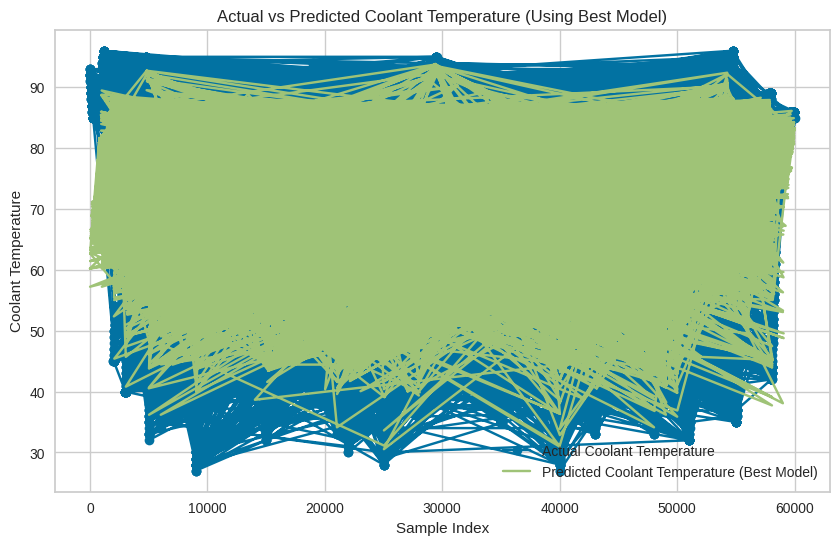

In [ ]:
predictions = predict_model(final_best_model)

# Create a comparison DataFrame using the correct column name for predictions
comparison_df = pd.DataFrame({
    'Actual Coolant Temperature': predictions['Coolant_temperature'],
    'Predicted Coolant Temperature': predictions['prediction_label']  # Use 'prediction_label' here
})

# Display the comparison table
print(comparison_df)

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual Coolant Temperature'], label='Actual Coolant Temperature', marker='o')
plt.plot(comparison_df['Predicted Coolant Temperature'], label='Predicted Coolant Temperature (Best Model)', marker='x')
plt.title('Actual vs Predicted Coolant Temperature (Using Best Model)')
plt.xlabel('Sample Index')
plt.ylabel('Coolant Temperature')
plt.legend()
plt.grid(True)
plt.show()

#**XGBoost**

In [40]:
import pandas as pd
import numpy as np

In [280]:
df2 = pd.read_csv('/content/combined_trips_find_time_index1.csv')

In [281]:
df_filtered = df2

In [282]:
df_filtered

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,0345,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed
0,760199,2024-09-01 22:05:53,2024-09-01 22:05:51,55,58,True,7.000,47.262,92,7.205,...,NaN,NaN,NaN,NaN,1231,35.689758,51.263241,12,305.13,0.0
1,760699,2024-09-01 22:05:55,2024-09-01 22:05:53,55,58,True,8.500,47.242,44,4.814,...,NaN,NaN,NaN,NaN,1231,35.689758,51.263241,12,305.13,0.0
2,761199,2024-09-01 22:05:55,2024-09-01 22:05:53,55,58,True,8.929,47.224,33,4.211,...,NaN,NaN,NaN,NaN,1231,35.689758,51.263241,12,305.13,0.0
3,761699,2024-09-01 22:05:55,2024-09-01 22:05:53,55,58,True,9.143,47.207,33,2.393,...,NaN,NaN,NaN,NaN,1231,35.689758,51.263241,12,305.13,0.0
4,762199,2024-09-01 22:05:55,2024-09-01 22:05:53,55,58,True,9.357,47.192,42,3.355,...,NaN,NaN,NaN,NaN,1231,35.689758,51.263241,12,305.13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283986,784199,2024-09-07 22:08:24,2024-09-07 21:48:54,95,-1,False,0.000,52.168,91,8.049,...,NaN,NaN,NaN,NaN,1292,35.720421,51.339321,12,0.00,0.0
283987,784699,2024-09-07 22:08:27,2024-09-07 21:48:56,95,-1,False,0.000,52.167,91,8.141,...,NaN,NaN,NaN,NaN,1293,35.720421,51.339321,12,0.00,0.0
283988,785199,2024-09-07 22:08:27,2024-09-07 21:48:56,95,-1,False,0.000,52.166,91,8.062,...,NaN,NaN,NaN,NaN,1293,35.720421,51.339321,12,0.00,0.0
283989,785699,2024-09-07 22:08:27,2024-09-07 21:48:56,95,-1,False,0.000,52.165,91,8.062,...,NaN,NaN,NaN,NaN,1293,35.720421,51.339321,12,0.00,0.0


In [253]:
df_filtered.describe()

,time,trip,signal,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,Accelerator_pedal_position,Coolant_temperature,Vehicle_Speed,...,0345,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed
count,2.839910e+05,283991.000000,283991.000000,283991.000000,283991.000000,283991.000000,283991.000000,283991.000000,283991.000000,283991.000000,...,0.0,0.0,0.0,0.0,283991.000000,283991.000000,283991.000000,283991.000000,283991.000000,283990.000000
mean,2.393682e+06,77.498678,67.808793,9.217281,57.044284,55.988401,12.670999,14.036505,82.271660,39.546820,...,NaN,NaN,NaN,NaN,802.304911,35.667114,49.499837,11.416820,173.963172,-0.007027
std,2.521215e+06,35.353643,25.214219,1.267526,24.578758,29.186132,16.798279,18.522118,10.274854,33.820567,...,NaN,NaN,NaN,NaN,607.933489,5.061290,6.995194,2.071685,104.154552,0.446235
min,0.000000e+00,1.000000,-1.000000,0.000000,0.745000,0.000000,-40.000000,0.000000,6.000000,0.000000,...,NaN,NaN,NaN,NaN,-12.000000,0.000000,0.000000,0.000000,0.000000,-6.295777
25%,7.706895e+05,58.000000,54.000000,9.214000,35.386500,35.000000,4.533000,0.000000,82.000000,3.000000,...,NaN,NaN,NaN,NaN,10.000000,35.715038,49.612190,12.000000,92.040000,0.000000
50%,1.298873e+06,74.000000,70.000000,9.357000,60.213000,46.000000,7.146000,0.000000,84.000000,37.000000,...,NaN,NaN,NaN,NaN,1234.000000,35.760654,50.917587,12.000000,180.000000,0.000000
75%,3.140016e+06,97.000000,87.000000,9.571000,77.235500,66.000000,13.232000,27.438000,86.000000,68.000000,...,NaN,NaN,NaN,NaN,1280.000000,37.356163,51.265144,12.000000,275.840000,0.000000
max,1.240521e+07,148.000000,100.000000,11.700000,95.277000,182.000000,104.287000,99.017000,113.000000,134.000000,...,NaN,NaN,NaN,NaN,1537.000000,37.681667,51.394466,12.000000,359.430000,6.261543


In [254]:
1.240521e+07

12405210.0

In [283]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})

In [284]:
df_filtered = df_filtered[['time', 'Coolant_temperature','Vehicle_Speed','Current_gear_shift_position_(Current_gear)']]

In [6]:
df_filtered['time'] = df_filtered['time']/12000000

<ipython-input-6-5dfa72bb0f90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time'] = df_filtered['time']/12000000


In [7]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)']/6

<ipython-input-7-a20eee7d8cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)']/6


In [8]:
df_filtered['Vehicle_Speed'] = df_filtered['Vehicle_Speed']/150

<ipython-input-8-ed9255c29c6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vehicle_Speed'] = df_filtered['Vehicle_Speed']/150


In [9]:
df_filtered['Coolant_temperature'] = df_filtered['Coolant_temperature']/100

<ipython-input-9-c5cf3ca318c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Coolant_temperature'] = df_filtered['Coolant_temperature']/100


In [10]:
df_filtered['initial_coolant_temp'] = df_filtered['initial_coolant_temp']/100

<ipython-input-10-85a937d02646>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['initial_coolant_temp'] = df_filtered['initial_coolant_temp']/100


In [259]:
df_filtered

,time,Coolant_temperature,Vehicle_Speed,Current_gear_shift_position_(Current_gear)
0,760199,91,0,0.0
1,760699,91,0,0.0
2,761199,91,0,0.0
3,761699,91,0,0.0
4,762199,91,0,0.0
...,...,...,...,...
283986,784199,86,0,0.0
283987,784699,86,0,0.0
283988,785199,86,0,0.0
283989,785699,86,0,0.0


In [260]:
from pycaret.regression import *

regression_setup = setup(data=df_filtered, target='Coolant_temperature', session_id=42)

# Create the XGBoost model
xgboost_model = create_model('xgboost')


# Finalize the XGBoost model (this retrains the model on the full dataset)
final_xgboost_model = finalize_model(xgboost_model)

# Save the XGBoost model
model_filename = 'xgboost_coolant_temperature_model'
save_model(final_xgboost_model, model_filename)
print(f"XGBoost model saved as {model_filename}")

# Test the model (you can use test data here as well)
predictions = predict_model(final_xgboost_model)

# Create a comparison DataFrame using the correct column name for predictions
comparison_df = pd.DataFrame({
    'Actual Coolant Temperature': predictions['Coolant_temperature'],
    'Predicted Coolant Temperature': predictions['prediction_label']  # Use 'prediction_label' here
})

# Display the comparison table
print(comparison_df)

,Description,Value
0,Session id,42
1,Target,Coolant_temperature
2,Target type,Regression
3,Original data shape,"(283991, 4)"
4,Transformed data shape,"(283991, 4)"
5,Transformed train set shape,"(198793, 4)"
6,Transformed test set shape,"(85198, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3405,13.8654,3.7236,0.8696,0.0491,0.0299
1,2.3080,12.5187,3.5382,0.8767,0.0449,0.0291
2,2.3451,14.1012,3.7552,0.8679,0.0488,0.0297
3,2.3284,13.5801,3.6851,0.8674,0.0484,0.0295
4,2.2969,13.0794,3.6165,0.8777,0.0472,0.0292
5,2.3512,13.8783,3.7254,0.8629,0.0483,0.0298
6,2.3343,13.8816,3.7258,0.8679,0.0483,0.0296
7,2.3340,13.9020,3.7285,0.8697,0.0484,0.0296
8,2.3389,13.6203,3.6906,0.8767,0.0479,0.0297


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved
XGBoost model saved as xgboost_coolant_temperature_model


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2.2913,13.0281,3.6094,0.8769,0.0464,0.0290


        Actual Coolant Temperature  Predicted Coolant Temperature
278927                          84                      84.012627
252818                          85                      82.771622
245469                          85                      85.663383
42216                           54                      56.454731
213451                          91                      85.234734
...                            ...                            ...
11006                           76                      79.035919
247450                          81                      84.364243
229567                          87                      86.659760
142340                          82                      85.681999
107422                          86                      84.653122

[85198 rows x 2 columns]


In [261]:
evaluate_model(xgboost_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **TestXGBoost**

In [229]:
trip_data = pd.read_excel('/content/Car_Dena_93 h 955 - ir 44_Data_09_20_2024, 01_01_00_to_09_22_2024, 15_39_00.xlsx')


In [230]:
trip_groups = trip_data.groupby('trip')


In [231]:
# Example for loop through grouped trips
for trip_id, trip_data in trip_groups:
    # Reset index for safe operations
    trip_data = trip_data.reset_index(drop=True)




In [262]:
trip_data = pd.read_csv('/content/18sh_Sheet1_slope_added.csv')


In [263]:
base_trip_data =pd.read_csv('/content/csv_data/trip_144_aligned.csv')

In [264]:
trip_data

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,Trip_fuel_consumption,RON_factor,altitude,latitude,longitude,satelites,bearing,angular_speed,correct_altitude,slope
0,41455,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.286,4.392,80,22.244,...,32844.672,0.063,0,0.000000,0.000000,0,0.0,NaN,1246,0.0
1,41955,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.286,8.188,89,27.832,...,33470.578,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
2,42455,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.214,11.762,97,35.512,...,34428.625,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
3,42955,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.286,14.821,106,38.049,...,35539.359,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
4,43455,2024-09-08 08:26:56,2024-09-08 08:09:02,1,80,False,9.286,17.574,114,37.062,...,36941.219,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,1082950,2024-09-08 08:26:21,2024-09-08 08:26:20,1,93,True,0.000,38.874,90,7.490,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0
2084,1083450,2024-09-08 08:26:23,2024-09-08 08:26:22,1,90,True,0.000,38.869,90,7.490,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0
2085,1083950,2024-09-08 08:26:23,2024-09-08 08:26:22,1,90,True,0.000,38.864,90,7.436,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0
2086,1084450,2024-09-08 08:26:23,2024-09-08 08:26:22,1,90,True,0.000,38.860,90,7.434,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0


In [ ]:
trip

In [265]:

# Process all other trips to align times based on the base trip
# for trip_id, trip_data in trip_groups:
# Reset index for safe operations
trip_data = trip_data.reset_index(drop=True)

# Skip trips with less than 500 rows
# if len(trip_data) < 500:
#     print(f"Trip {trip_id} has less than 500 rows, skipping.")
#     continue

# Get the first coolant temperature in this trip
first_trip_temp = trip_data['Coolant_temperature'].iloc[0]
# first_trip_temp = 50

# Check if the first temperature is present in the base trip, and find the closest match
matching_temps = base_trip_data.iloc[(base_trip_data['Coolant_temperature'] - first_trip_temp).abs().argsort()[:1]]

if matching_temps.empty:
    # If no match is found in the base trip, skip this trip
    print(f"No matching temperature found in base trip for trip {trip_id}, skipping.")


# Find the time in the base trip for the closest matching temperature
match_time_in_base = matching_temps['time'].values[0]
print(f'Found matching temperature {first_trip_temp}  at base time {match_time_in_base}.')

# Adjust the time of the current trip to start from the base trip's match time
trip_initial_time = trip_data['time'].iloc[0]
trip_data['time'] = trip_data['time'] - trip_initial_time + match_time_in_base

# # Save the modified trip data to a separate CSV file
# trip_file_name = f'{folder_path}/trip_{trip_id}_aligned.csv'
# trip_data.to_csv(trip_file_name, index=False)

# print(f'Saved {trip_file_name} with time aligned based on base trip starting from time {match_time_in_base}.')


Found matching temperature 35  at base time 56700.


In [267]:
trip_data

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,Trip_fuel_consumption,RON_factor,altitude,latitude,longitude,satelites,bearing,angular_speed,correct_altitude,slope
0,56700,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.286,4.392,80,22.244,...,32844.672,0.063,0,0.000000,0.000000,0,0.0,NaN,1246,0.0
1,57200,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.286,8.188,89,27.832,...,33470.578,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
2,57700,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.214,11.762,97,35.512,...,34428.625,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
3,58200,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.286,14.821,106,38.049,...,35539.359,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
4,58700,2024-09-08 08:26:56,2024-09-08 08:09:02,1,80,False,9.286,17.574,114,37.062,...,36941.219,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,1098195,2024-09-08 08:26:21,2024-09-08 08:26:20,1,93,True,0.000,38.874,90,7.490,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0
2084,1098695,2024-09-08 08:26:23,2024-09-08 08:26:22,1,90,True,0.000,38.869,90,7.490,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0
2085,1099195,2024-09-08 08:26:23,2024-09-08 08:26:22,1,90,True,0.000,38.864,90,7.436,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0
2086,1099695,2024-09-08 08:26:23,2024-09-08 08:26:22,1,90,True,0.000,38.860,90,7.434,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0


In [268]:
df_filtered = trip_data

In [269]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})

In [270]:
df_filtered = df_filtered[['time', 'Coolant_temperature','Vehicle_Speed','Current_gear_shift_position_(Current_gear)']]

In [245]:
df_filtered.describe()

,time,Coolant_temperature,Vehicle_Speed,Current_gear_shift_position_(Current_gear)
count,7782.000000,7782.000000,7782.000000,7782.000000
mean,2.068549,83.467875,60.380236,0.671796
std,0.841268,1.697972,33.021259,0.298156
min,0.610725,71.000000,0.000000,0.000000
25%,1.340463,83.000000,38.000000,0.500000
50%,2.068683,83.000000,69.000000,0.830000
75%,2.796919,84.000000,85.000000,0.830000
max,3.525138,89.000000,120.000000,1.000000


In [240]:
df_filtered['time'] = df_filtered['time']/1335623.0

In [241]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = (df_filtered['Current_gear_shift_position_(Current_gear)']/6).round(2)

In [246]:
df_filtered['Vehicle_Speed'] = (df_filtered['Vehicle_Speed']/150).round(2)

In [247]:
df_filtered['Coolant_temperature'] = df_filtered['Coolant_temperature']/120

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,1.3502,3.0844,1.7562,0.9794,0.0255,0.0188


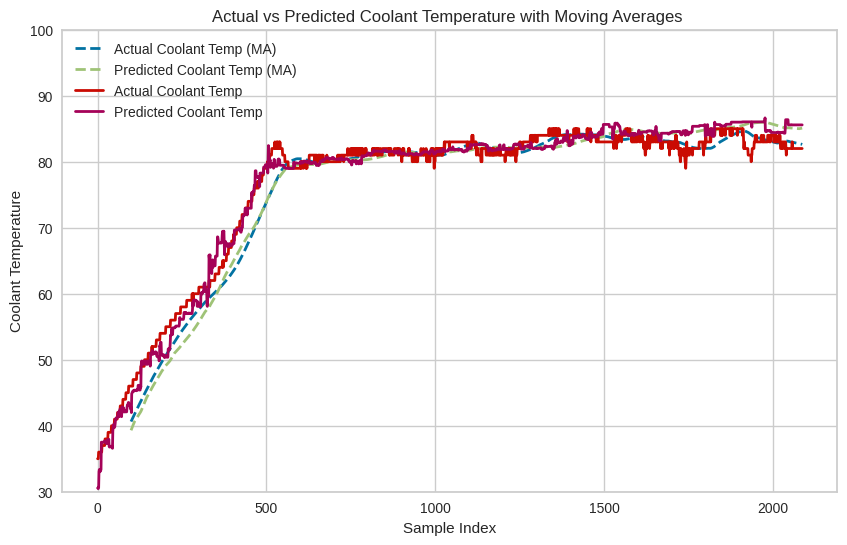

In [271]:
predictions = predict_model(final_xgboost_model, data=df_filtered)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual Coolant Temperature': df_filtered['Coolant_temperature'],
    'Predicted Coolant Temperature': predictions['prediction_label']  # Using 'prediction_label' as the predicted value
})

# Calculate moving averages for both actual and predicted values
window_size = 100
comparison_df['Actual Coolant Temp (MA)'] = comparison_df['Actual Coolant Temperature'].rolling(window=window_size).mean()
comparison_df['Predicted Coolant Temp (MA)'] = comparison_df['Predicted Coolant Temperature'].rolling(window=window_size).mean()

# Plot the Moving Averages
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual Coolant Temp (MA)'], label='Actual Coolant Temp (MA)', linestyle='--', linewidth=2)
plt.plot(comparison_df['Predicted Coolant Temp (MA)'], label='Predicted Coolant Temp (MA)', linestyle='--', linewidth=2)
plt.plot(comparison_df['Actual Coolant Temperature'], label='Actual Coolant Temp', linestyle='-', linewidth=2)
plt.plot(comparison_df['Predicted Coolant Temperature'], label='Predicted Coolant Temp', linestyle='-', linewidth=2)
plt.title(f'Actual vs Predicted Coolant Temperature with Moving Averages ')
plt.xlabel('Sample Index')
plt.ylabel('Coolant Temperature')
plt.ylim(30, 100)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#test nedc

In [272]:
trip_data = pd.read_csv('/content/Interpolated_Data__2Hz_.csv')
base_trip_data =pd.read_csv('/content/csv_data/trip_144_aligned.csv')

In [273]:
trip_data['time'] = trip_data['Time']*1000

In [274]:
trip_data[[ 'Vehicle_Speed','Current_gear_shift_position_(Current_gear)']] = trip_data[['Speed','gear']]

In [275]:
trip_data

,Time,Speed,Accelerator pedal position,Throttle position,FC_avg_rate,Engine speed,Trip fuel consumption,slope,gear,time,Vehicle_Speed,Current_gear_shift_position_(Current_gear)
0,1.0,0.0,0.0,8.654542,0.000000,0.000,0.0000,0.0,0.0,1000.0,0.0,0.0
1,1.5,0.0,0.0,8.654596,0.000000,0.000,0.0000,0.0,0.0,1500.0,0.0,0.0
2,2.0,0.0,0.0,8.654650,0.000000,0.000,0.0000,0.0,0.0,2000.0,0.0,0.0
3,2.5,0.0,0.0,8.651409,0.000000,0.000,0.0000,0.0,0.0,2500.0,0.0,0.0
4,3.0,0.0,0.0,8.648169,0.000000,0.000,0.0000,0.0,0.0,3000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2470,1216.0,0.0,0.0,8.730512,0.109375,322.125,812961.5313,0.0,0.0,1216000.0,0.0,0.0
2471,1216.5,0.0,0.0,8.734644,0.109375,322.125,812961.5313,0.0,0.0,1216500.0,0.0,0.0
2472,1217.0,0.0,0.0,8.738776,0.109375,322.125,812961.5313,0.0,0.0,1217000.0,0.0,0.0
2473,1217.5,0.0,0.0,8.954587,0.109375,322.125,812961.5313,0.0,0.0,1217500.0,0.0,0.0


In [276]:

# Process all other trips to align times based on the base trip
# for trip_id, trip_data in trip_groups:
# Reset index for safe operations
trip_data = trip_data.reset_index(drop=True)

# Skip trips with less than 500 rows
# if len(trip_data) < 500:
#     print(f"Trip {trip_id} has less than 500 rows, skipping.")
#     continue

# Get the first coolant temperature in this trip
# first_trip_temp = trip_data['Coolant_temperature'].iloc[0]
first_trip_temp = 25

# Check if the first temperature is present in the base trip, and find the closest match
matching_temps = base_trip_data.iloc[(base_trip_data['Coolant_temperature'] - first_trip_temp).abs().argsort()[:1]]

if matching_temps.empty:
    # If no match is found in the base trip, skip this trip
    print(f"No matching temperature found in base trip for trip {trip_id}, skipping.")


# Find the time in the base trip for the closest matching temperature
match_time_in_base = matching_temps['time'].values[0]
print(f'Found matching temperature {first_trip_temp}  at base time {match_time_in_base}.')

# Adjust the time of the current trip to start from the base trip's match time
trip_initial_time = trip_data['time'].iloc[0]
trip_data['time'] = trip_data['time'] - trip_initial_time + match_time_in_base

# # Save the modified trip data to a separate CSV file
# trip_file_name = f'{folder_path}/trip_{trip_id}_aligned.csv'
# trip_data.to_csv(trip_file_name, index=False)

# print(f'Saved {trip_file_name} with time aligned based on base trip starting from time {match_time_in_base}.')


Found matching temperature 25  at base time 0.


In [194]:
df_filtered = trip_data

In [277]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})

In [278]:
df_filtered = df_filtered[['time','Vehicle_Speed','Current_gear_shift_position_(Current_gear)']]

In [197]:
df_filtered.describe()

,time,Vehicle_Speed,Current_gear_shift_position_(Current_gear)
count,2.475000e+03,2475.000000,2475.000000
mean,6.077598e+05,31.134581,2.149495
std,3.510768e+05,30.502517,1.816144
min,0.000000e+00,0.000000,0.000000
25%,3.042500e+05,0.000000,0.000000
50%,6.075000e+05,29.267077,2.000000
75%,9.107500e+05,48.835056,4.000000
max,1.217000e+06,118.303374,5.000000


In [198]:
df_filtered['time'] = df_filtered['time']/1335623.0

In [199]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = (df_filtered['Current_gear_shift_position_(Current_gear)']/6).round(2)

In [200]:
df_filtered['Vehicle_Speed'] = (df_filtered['Vehicle_Speed']/150).round(2)

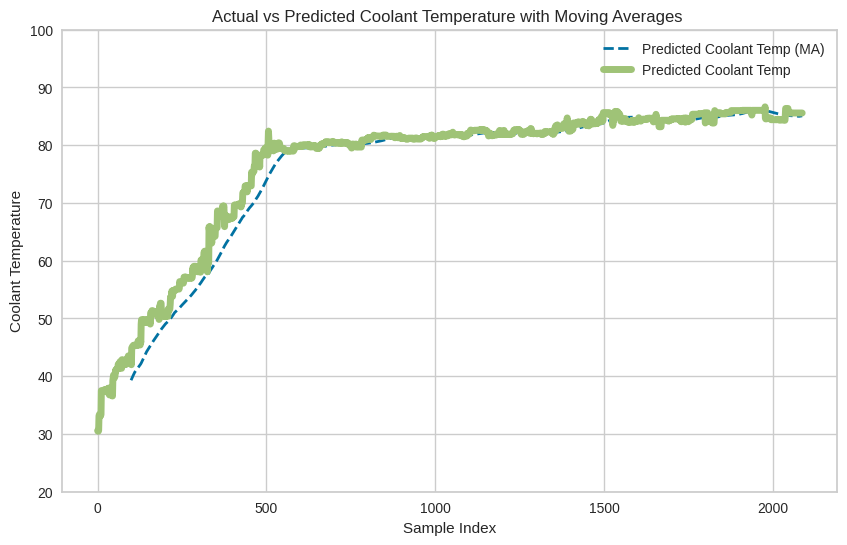

In [279]:
predictions = predict_model(final_xgboost_model, data=df_filtered)

# Create comparison DataFrame
comparison_df = pd.DataFrame({

    'Predicted Coolant Temperature': predictions['prediction_label']  # Using 'prediction_label' as the predicted value
})

# Calculate moving averages for both actual and predicted values
window_size = 100
# comparison_df['Actual Coolant Temp (MA)'] = comparison_df['Actual Coolant Temperature'].rolling(window=window_size).mean()
comparison_df['Predicted Coolant Temp (MA)'] = comparison_df['Predicted Coolant Temperature'].rolling(window=window_size).mean()

# Plot the Moving Averages
plt.figure(figsize=(10, 6))
# plt.plot(comparison_df['Actual Coolant Temp (MA)'], label='Actual Coolant Temp (MA)', linestyle='--', linewidth=2)
plt.plot(comparison_df['Predicted Coolant Temp (MA)'], label='Predicted Coolant Temp (MA)', linestyle='--', linewidth=2)
plt.plot(comparison_df['Predicted Coolant Temperature'], label='Predicted Coolant Temp', linewidth=5)

plt.title(f'Actual vs Predicted Coolant Temperature with Moving Averages ')
plt.xlabel('Sample Index')
plt.ylabel('Coolant Temperature')
plt.ylim(20, 100)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import os
from pycaret.regression import *
import matplotlib.pyplot as plt

# Function to reset time and update initial coolant temperature when there's a drop of more than 20 degrees
def update_initial_temp_and_reset_time(df):
    # Start by resetting the time for the first row
    initial_temp = df['Coolant_temperature'].iloc[0]
    reset_time = df['time'].iloc[0]

    for i in range(len(df)):
        if i == 0:
            # Reset the time for the first row
            df.at[i, 'time'] = 0
        else:
            prev_temp = df['Coolant_temperature'].iloc[i - 1]
            current_temp = df['Coolant_temperature'].iloc[i]

            # Check if the temperature drop exceeds 20 degrees
            if prev_temp - current_temp > 20:
                initial_temp = current_temp
                reset_time = df['time'].iloc[i]  # Reset the time reference

            # Set the initial temperature for the current row
            df.at[i, 'Initial_Coolant_Temperature'] = initial_temp

            # Adjust the time based on the last reset point
            df.at[i, 'time'] = df['time'].iloc[i] - reset_time

    return df

# Path to the folder containing the Excel files
folder_path = '/content/'

# Initialize an empty DataFrame to append data from all Excel files
combined_data = pd.DataFrame()

# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        # Load each Excel file
        df = pd.read_excel(file_path)

        # Preprocess the data
        df_filtered = df[['time', 'Coolant_temperature', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)']].dropna()

        # Add the initial coolant temperature column and reset time when initial temp changes
        df_filtered['Initial_Coolant_Temperature'] = df_filtered['Coolant_temperature'].iloc[0]
        df_with_updated_initial_temp = update_initial_temp_and_reset_time(df_filtered)

        # Append the processed data to the combined DataFrame
        combined_data = pd.concat([combined_data, df_with_updated_initial_temp], ignore_index=True)

# Prepare training datasets
X_train = combined_data[['time', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)', 'Initial_Coolant_Temperature']]
y_train = combined_data['Coolant_temperature']

# Combine features and target in one DataFrame for PyCaret
train_data = combined_data.copy()

# Add the target column explicitly
train_data['Coolant_temperature'] = y_train

# PyCaret setup
# Set up the PyCaret environment for regression and define the target column
regression_setup = setup(data=train_data, target='Coolant_temperature', session_id=42, silent=True, normalize=True)

# Compare all models and select the best one
best_model = compare_models()

# Finalize the best model (this retrains the best model on the full dataset)
final_best_model = finalize_model(best_model)

# Save the best model
model_filename = 'best_coolant_temperature_model.pkl'
save_model(final_best_model, model_filename)
print(f"Best model saved as {model_filename}")

# Test the model (you can use test data here as well)
predictions = predict_model(final_best_model)

# Display a comparison of actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual Coolant Temperature': predictions['Coolant_temperature'],
    'Predicted Coolant Temperature': predictions['Label']  # Label is the predicted value in PyCaret
})

# Display the comparison table
print(comparison_df)

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual Coolant Temperature'], label='Actual Coolant Temperature', marker='o')
plt.plot(comparison_df['Predicted Coolant Temperature'], label='Predicted Coolant Temperature (Best Model)', marker='x')
plt.title('Actual vs Predicted Coolant Temperature (Using Best Model)')
plt.xlabel('Sample Index')
plt.ylabel('Coolant Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
importances = rf_model_with_initial_temp.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
print(importance_df)


In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the saved Random Forest model
model_filename = 'random_forest_coolant_temp_model.pkl'
rf_model_loaded = joblib.load(model_filename)
print(f"Model loaded from {model_filename}")

# Load new input data from CSV
csv_file_path = '/content/Car_Dena_93 h 955 - ir 44_Data_08_16_2024, 18_34_00_to_08_18_2024, 18_35_00_Arjangi_raft_asr_Sunday_alt_correct.xlsx'
df_test = pd.read_excel(csv_file_path)

# Function to detect coolant temperature drop and update initial temperature
def update_initial_temp_and_reset_time(df):
    # Start by resetting the time for the first row
    initial_temp = df['Coolant_temperature'].iloc[0]
    reset_time = df['time'].iloc[0]

    for i in range(len(df)):
        if i == 0:
            # Reset the time for the first row
            df.at[i, 'time'] = 0
        else:
            prev_temp = df['Coolant_temperature'].iloc[i - 1]
            current_temp = df['Coolant_temperature'].iloc[i]

            # Check if the temperature drop exceeds 20 degrees
            if prev_temp - current_temp > 20:
                initial_temp = current_temp
                reset_time = df['time'].iloc[i]  # Reset the time reference

            # Set the initial temperature for the current row
            df.at[i, 'Initial_Coolant_Temperature'] = initial_temp

            # Adjust the time based on the last reset point
            df.at[i, 'time'] = df['time'].iloc[i] - reset_time

    return df

df_test_filtered = df_test[['time', 'Coolant_temperature', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)']].dropna()

# Apply the same preprocessing as in the training process

# 1. Map gear 13 to 0 and gear 14 to 1, then normalize gear to [0, 6]
df_test_filtered['Current_gear_shift_position_(Current_gear)'] = df_test_filtered['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})
gear_scaler = MinMaxScaler(feature_range=(0, 6))
df_test_filtered['Current_gear_shift_position_(Current_gear)'] = gear_scaler.fit_transform(df_test_filtered[['Current_gear_shift_position_(Current_gear)']])

# 2. Normalize the speed to [0, 150]
speed_scaler = MinMaxScaler(feature_range=(0, 150))
df_test_filtered['Vehicle_Speed'] = speed_scaler.fit_transform(df_test_filtered[['Vehicle_Speed']])

# 3. Normalize the coolant temperature to [20, 100]
temp_scaler = MinMaxScaler(feature_range=(20, 100))
df_test_filtered['Coolant_temperature'] = temp_scaler.fit_transform(df_test_filtered[['Coolant_temperature']])

# 4. Add the initial coolant temperature column
df_test_filtered['Initial_Coolant_Temperature'] = df_test_filtered['Coolant_temperature'].iloc[0]
df_test_with_updated_initial_temp = update_initial_temp_with_coolant_drop(df_test_filtered)

# Prepare test datasets
X_test = df_test_with_updated_initial_temp[['time', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)', 'Initial_Coolant_Temperature']]
y_test = df_test_with_updated_initial_temp['Coolant_temperature']

# 5. Scale the time column using StandardScaler (you should use the same scaler as in training)
time_scaler = StandardScaler()
X_test['time'] = time_scaler.fit_transform(X_test[['time']])

# Make predictions on the new test data using the loaded model
y_pred_rf = rf_model_loaded.predict(X_test)

# Create a DataFrame to compare actual vs predicted values
test_comparison_df = pd.DataFrame({
    'Actual Coolant Temperature': y_test.values,
    'Predicted Coolant Temperature': y_pred_rf
})

# Display the comparison table
print(test_comparison_df)

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_comparison_df['Actual Coolant Temperature'], label='Actual Coolant Temperature', marker='o')
plt.plot(test_comparison_df['Predicted Coolant Temperature'], label='Predicted Coolant Temperature (Random Forest)', marker='x')
plt.title('Actual vs Predicted Coolant Temperature (Test Data)')
plt.xlabel('Sample Index')
plt.ylabel('Coolant Temperature')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/random_forest_coolant_temp_model_with_time_reset.pkl.pkl'

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV


# Function to detect coolant temperature drop and update initial temperature
def update_initial_temp_with_coolant_drop(df):
    # Start with the first row's coolant temperature as the initial temperature
    initial_temp = df['Coolant_temperature'].iloc[0]

    # Iterate through each row and check if there's a drop of more than 20 degrees
    for i in range(1, len(df)):
        prev_temp = df['Coolant_temperature'].iloc[i - 1]
        current_temp = df['Coolant_temperature'].iloc[i]

        # Check if the temperature drop exceeds 20 degrees
        if prev_temp - current_temp > 20:
            initial_temp = current_temp

        # Set the initial temperature for the current row
        df.at[i, 'Initial_Coolant_Temperature'] = initial_temp

    return df

# Directory containing the Excel files
directory_path = '/content/'

# List to hold all data from the Excel files
all_data = []
for filename in os.listdir(directory_path):
    if filename.endswith(".xlsx"):  # Only process Excel files
        file_path = os.path.join(directory_path, filename)

        # Load the Excel file
        df = pd.read_excel(file_path)

        # Extract the relevant columns and drop any rows with missing data
        df_filtered = df[['time', 'Coolant_temperature', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)']].dropna()

        # Map gear 13 to 0 and gear 14 to 1, then normalize gear to [0, 6]
        df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})
        gear_scaler = MinMaxScaler(feature_range=(0, 6))
        df_filtered['Current_gear_shift_position_(Current_gear)'] = gear_scaler.fit_transform(df_filtered[['Current_gear_shift_position_(Current_gear)']])

        # Normalize the speed to [0, 150]
        speed_scaler = MinMaxScaler(feature_range=(0, 150))
        df_filtered['Vehicle_Speed'] = speed_scaler.fit_transform(df_filtered[['Vehicle_Speed']])

        # Normalize the coolant temperature to [20, 100]
        temp_scaler = MinMaxScaler(feature_range=(20, 100))
        df_filtered['Coolant_temperature'] = temp_scaler.fit_transform(df_filtered[['Coolant_temperature']])

        # Add the initial coolant temperature column with a placeholder
        df_filtered['Initial_Coolant_Temperature'] = df_filtered['Coolant_temperature'].iloc[0]

        # Update initial coolant temperature when there's a drop greater than 20
        df_with_updated_initial_temp = update_initial_temp_with_coolant_drop(df_filtered)

        # Append the data to the list
        all_data.append(df_with_updated_initial_temp)

# Concatenate all data
combined_data = pd.concat(all_data, ignore_index=True)

# Define input (X) and output (y) variables
X = combined_data[['time', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)', 'Initial_Coolant_Temperature']]
y = combined_data['Coolant_temperature']

# Use StandardScaler only for the time column
time_scaler = StandardScaler()
X['time'] = time_scaler.fit_transform(X[['time']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether to bootstrap samples when building trees
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize the RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters from the random search
print(f"Best parameters: {random_search.best_params_}")

# Use the best estimator to make predictions
best_rf_model = random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Calculate the mean squared error for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error of the best model: {mse_best}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


<ipython-input-21-888972f98395>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['time'] = time_scaler.fit_transform(X[['time']])
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import os
from pycaret.regression import *
import matplotlib.pyplot as plt

# Function to reset time and update initial coolant temperature when there's a drop of more than 20 degrees
def update_initial_temp_and_reset_time(df):
    # Start by resetting the time for the first row
    initial_temp = df['Coolant_temperature'].iloc[0]
    reset_time = df['time'].iloc[0]

    for i in range(len(df)):
        if i == 0:
            # Reset the time for the first row
            df.at[i, 'time'] = 0
        else:
            prev_temp = df['Coolant_temperature'].iloc[i - 1]
            current_temp = df['Coolant_temperature'].iloc[i]

            # Check if the temperature drop exceeds 20 degrees
            if prev_temp - current_temp > 20:
                initial_temp = current_temp
                reset_time = df['time'].iloc[i]  # Reset the time reference

            # Set the initial temperature for the current row
            df.at[i, 'Initial_Coolant_Temperature'] = initial_temp

            # Adjust the time based on the last reset point
            df.at[i, 'time'] = df['time'].iloc[i] - reset_time

    return df

# Path to the folder containing the Excel files
folder_path = '/content/'

# Initialize an empty DataFrame to append data from all Excel files
combined_data = pd.DataFrame()

# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(folder_path, file_name)
        # Load each Excel file
        df = pd.read_excel(file_path)

        # Preprocess the data
        df_filtered = df[['time', 'Coolant_temperature', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)']].dropna()

        # Add the initial coolant temperature column and reset time when initial temp changes
        df_filtered['Initial_Coolant_Temperature'] = df_filtered['Coolant_temperature'].iloc[0]
        df_with_updated_initial_temp = update_initial_temp_and_reset_time(df_filtered)

        # Append the processed data to the combined DataFrame
        combined_data = pd.concat([combined_data, df_with_updated_initial_temp], ignore_index=True)

# Prepare training datasets
X_train = combined_data[['time', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)', 'Initial_Coolant_Temperature']]
y_train = combined_data['Coolant_temperature']

# Combine features and target in one DataFrame for PyCaret
train_data = combined_data.copy()

# Add the target column explicitly
train_data['Coolant_temperature'] = y_train

# PyCaret setup
# Set up the PyCaret environment for regression and define the target column
regression_setup = setup(data=train_data, target='Coolant_temperature', session_id=42,  normalize=True)

# Compare all models and select the best one
best_model = compare_models()

# Finalize the best model (this retrains the best model on the full dataset)
final_best_model = finalize_model(best_model)

# Save the best model
model_filename = 'best_coolant_temperature_model.pkl'
save_model(final_best_model, model_filename)
print(f"Best model saved as {model_filename}")

# Test the model (you can use test data here as well)
predictions = predict_model(final_best_model)

# Display a comparison of actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual Coolant Temperature': predictions['Coolant_temperature'],
    'Predicted Coolant Temperature': predictions['Label']  # Label is the predicted value in PyCaret
})

# Display the comparison table
print(comparison_df)

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual Coolant Temperature'], label='Actual Coolant Temperature', marker='o')
plt.plot(comparison_df['Predicted Coolant Temperature'], label='Predicted Coolant Temperature (Best Model)', marker='x')
plt.title('Actual vs Predicted Coolant Temperature (Using Best Model)')
plt.xlabel('Sample Index')
plt.ylabel('Coolant Temperature')
plt.legend()
plt.grid(True)
plt.show()


# **Physics formula**

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your DataFrame
df = pd.read_csv('your_data.csv')

# Ensure the DataFrame is sorted by time
df = df.sort_values('time').reset_index(drop=True)

# Convert Vehicle Speed to m/s
df['Vehicle_speed_mps'] = df['Vehicle_speed'] * (1000/3600)

# Calculate delta_t
df['delta_t'] = df['time'].diff().fillna(0)

# Map gear ratios
gear_ratios = {
    1: 3.6,
    2: 2.1,
    3: 1.4,
    4: 1.0,
    5: 0.8,
    6: 0.7
}

final_drive_ratio = 3.9  # Example value
wheel_radius = 0.3  # In meters

df['gear_ratio'] = df['Current_gear_shift_position_(Current_gear)'].map(gear_ratios)

# Calculate Engine Speed (RPM)
df['Engine_speed'] = df['Vehicle_speed_mps'] * df['gear_ratio'] * final_drive_ratio * (60 / (2 * np.pi * wheel_radius))

# Handle missing values
df['Engine_speed'] = df['Engine_speed'].fillna(method='ffill')


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('/content/combined_trips.csv')

In [ ]:
df

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed,initial_coolant_temp
0,0,2024-09-01 14:26:04,2024-09-01 14:24:57,14,0,True,9.643,4.118,46,11.291,...,NaN,NaN,NaN,0,0.000000,0.000000,0,244.92,-0.001817,80
1,500,2024-09-01 14:26:04,2024-09-01 14:24:57,14,0,True,9.643,8.255,30,5.688,...,NaN,NaN,NaN,0,0.000000,0.000000,0,244.92,0.000000,80
2,1000,2024-09-01 14:26:04,2024-09-01 14:24:57,14,0,True,9.571,14.920,28,5.324,...,NaN,NaN,NaN,0,0.000000,0.000000,0,244.92,0.000000,80
3,1500,2024-09-01 14:26:04,2024-09-01 14:24:57,14,0,True,9.643,20.016,27,3.906,...,NaN,NaN,NaN,0,0.000000,0.000000,0,244.92,0.000000,80
4,2000,2024-09-01 14:36:37,2024-09-01 14:24:59,14,0,False,9.571,22.446,59,13.445,...,NaN,NaN,NaN,0,0.000000,0.000000,0,244.92,0.000000,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,497492,2024-09-15 11:01:23,2024-09-15 11:01:15,112,70,True,9.571,80.382,33,4.086,...,NaN,NaN,NaN,1223,35.717541,51.199665,12,103.07,0.000000,60
58996,497992,2024-09-15 11:07:39,2024-09-15 11:01:17,112,70,False,9.571,79.363,34,4.061,...,NaN,NaN,NaN,1223,35.717518,51.199772,12,104.83,0.061436,60
58997,498492,2024-09-15 11:07:39,2024-09-15 11:01:17,112,70,False,9.643,77.584,33,4.262,...,NaN,NaN,NaN,1223,35.717518,51.199772,12,104.83,0.000000,60
58998,498992,2024-09-15 11:07:39,2024-09-15 11:01:17,112,70,False,9.714,79.198,29,4.434,...,NaN,NaN,NaN,1223,35.717518,51.199772,12,104.83,0.000000,60


In [ ]:
def objective_function(params, df):
    k1, k2, T_ambient = params
    T_pred = np.zeros(len(df))
    T_pred[0] = df['Coolant_temperature'].iloc[0]

    for i in range(1, len(df)):
        T_i = df['initial_coolant_temp'].iloc[i]
        delta_t = df['time'].iloc[i]
        Engine_Speed_i = df['Engine_speed'].iloc[i]
        Vehicle_Speed_i = df['Vehicle_Speed'].iloc[i]
        T_pred[i] = T_i + delta_t * (k1 * Engine_Speed_i - k2 * Vehicle_Speed_i * (T_i - T_ambient))

    residuals = T_pred - df['Coolant_temperature'].values
    return residuals



# Initial guesses and bounds
initial_guess = [1, 1, 20]
bounds = ([0, 0, -5], [np.inf, np.inf, 35])

# Optimize parameters
result = least_squares(objective_function, initial_guess, args=(df,), bounds=bounds)
k1_opt, k2_opt, T_ambient_opt = result.x

print(f"Optimized k1: {k1_opt}")
print(f"Optimized k2: {k2_opt}")
print(f"Optimized T_ambient: {T_ambient_opt}")


Optimized k1: 4.735585170431173e-08
Optimized k2: 2.9541627815648558e-08
Optimized T_ambient: 34.99999996818102


In [ ]:
df2 = pd.read_csv('/content/18sh_Sheet5_slope_added.csv')

In [ ]:

df2['time'] = df2['time'] - 332

In [ ]:
df2

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,Trip_fuel_consumption,RON_factor,altitude,latitude,longitude,satelites,bearing,angular_speed,correct_altitude,slope
0,34103,2024-09-08 11:32:09,2024-09-08 11:32:06,5,100,True,9.286,4.314,47,5.584,...,21009.516,0,0,0.000000,0.000000,0,244.84,-0.007194,1222,0.0
1,34603,2024-09-08 11:32:09,2024-09-08 11:32:06,5,100,True,9.357,7.608,54,7.574,...,21148.672,0,0,0.000000,0.000000,0,244.84,0.000000,1222,0.0
2,35103,2024-09-08 11:32:09,2024-09-08 11:32:06,5,100,True,9.286,10.886,59,9.848,...,21472.531,0,0,0.000000,0.000000,0,244.84,0.000000,1222,0.0
3,35603,2024-09-08 11:32:09,2024-09-08 11:32:06,5,100,True,9.357,13.680,67,12.188,...,21885.828,0,0,0.000000,0.000000,0,244.84,0.000000,1222,0.0
4,36103,2024-09-08 11:32:10,2024-09-08 11:32:08,5,100,True,9.214,15.449,57,9.914,...,22443.000,0,0,0.000000,0.000000,0,244.84,0.000000,1222,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,1470087,2024-09-08 12:12:21,2024-09-08 11:56:03,5,74,False,8.429,42.325,91,7.812,...,1063994.375,0,1233,35.720703,51.158806,12,90.00,0.000000,1209,0.0
2873,1470587,2024-09-08 12:12:21,2024-09-08 11:56:03,5,74,False,8.429,40.995,92,0.996,...,1063994.375,0,1233,35.720703,51.158806,12,90.00,0.000000,1209,0.0
2874,1471087,2024-09-08 12:12:21,2024-09-08 11:56:03,5,74,False,8.429,43.209,91,1.088,...,1063994.375,0,1233,35.720703,51.158806,12,90.00,0.000000,1209,0.0
2875,1471587,2024-09-08 12:12:21,2024-09-08 11:56:03,5,74,False,8.357,41.437,91,1.088,...,1063994.375,0,1233,35.720703,51.158806,12,90.00,0.000000,1209,0.0


MAE: 28.25 °C
RMSE: 34.70 °C


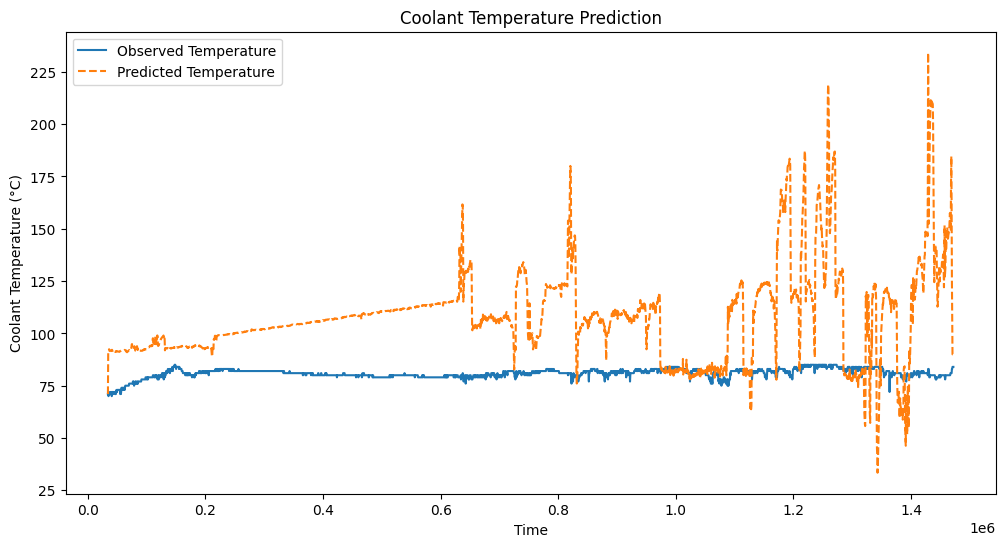

In [ ]:
# Calculate predicted temperatures
T_pred = np.zeros(len(df2))
T_pred[0] = df2['Coolant_temperature'].iloc[0]

for i in range(1, len(df2)):
    T_i = 90
    delta_t = df2['time'].iloc[i]
    Engine_Speed_i = df2['Engine_speed'].iloc[i]
    Vehicle_Speed_i = df2['Vehicle_Speed'].iloc[i]

    T_pred[i] = T_i + delta_t * (k1_opt * Engine_Speed_i - k2_opt * Vehicle_Speed_i * (T_i - T_ambient_opt))

df2['T_predicted'] = T_pred

# Evaluate the model
mae = mean_absolute_error(df2['Coolant_temperature'], df2['T_predicted'])
rmse = np.sqrt(mean_squared_error(df2['Coolant_temperature'], df2['T_predicted']))

print(f"MAE: {mae:.2f} °C")
print(f"RMSE: {rmse:.2f} °C")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df2['time'], df2['Coolant_temperature'], label='Observed Temperature')
plt.plot(df2['time'], df2['T_predicted'], label='Predicted Temperature', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Coolant Temperature (°C)')
plt.title('Coolant Temperature Prediction')
plt.legend()
plt.show()


# **Physics formula and genetic algorithm**

In [ ]:
pip install geneticalgorithm

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Install the geneticalgorithm package if not already installed
# !pip install geneticalgorithm

from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your DataFrame
# Replace 'your_data.csv' with the path to your CSV file
df = pd.read_excel('/content/Car_Dena_93 h 955 - ir 44_Data_08_17_2024, 00_01_00_to_09_17_2024, 08_18_00.xlsx')
df = df[df['time'] >= 0]  # Filter out rows where time is negative
df = df[df['Coolant_temperature'] >= 0]
# Ensure the DataFrame is sorted by time
df = df.sort_values('time').reset_index(drop=True)


In [ ]:
Engine_speed

In [ ]:
df['Vehicle_speed_mps'] = df['Vehicle_Speed'] * (1000/3600)

In [ ]:
df['delta_t'] = df['time'].diff().fillna(0)

In [ ]:
df

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed,Vehicle_speed_mps,delta_t
0,328,2024-09-05 20:07:04,2024-09-05 20:06:25,58,0,True,9.643,7.804,37,4.424,...,NaN,NaN,0,0.000000,0.000000,0,242.65,-0.014048,0.0,0.0
1,328,2024-09-04 09:25:11,2024-09-04 09:24:38,53,0,True,8.857,5.725,28,3.420,...,NaN,NaN,0,0.000000,0.000000,0,242.65,0.021857,0.0,0.0
2,328,2024-09-14 17:18:49,2024-09-14 17:18:16,107,0,True,9.714,1.529,34,4.125,...,NaN,NaN,0,0.000000,0.000000,0,244.91,-0.001004,0.0,0.0
3,328,2024-09-02 12:04:33,2024-09-02 12:03:59,41,0,True,9.714,8.392,36,4.568,...,NaN,NaN,0,0.000000,0.000000,0,242.65,0.000021,0.0,0.0
4,329,2024-09-01 21:38:54,2024-09-01 21:38:20,32,0,True,8.857,3.529,33,4.549,...,NaN,NaN,0,0.000000,0.000000,0,244.92,-0.002139,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253249,22252620,2024-09-02 06:36:29,2024-09-02 04:23:56,40,48,False,0.000,85.468,105,7.629,...,NaN,NaN,2,37.379761,49.568424,12,270.00,0.000000,0.0,500.0
253250,22253120,2024-09-02 04:23:59,2024-09-02 04:23:58,40,51,True,0.000,85.470,105,7.596,...,NaN,NaN,2,37.379761,49.568424,12,270.00,0.000000,0.0,500.0
253251,22253620,2024-09-02 04:23:59,2024-09-02 04:23:58,40,51,True,0.000,85.472,105,7.629,...,NaN,NaN,2,37.379761,49.568424,12,270.00,0.000000,0.0,500.0
253252,22254120,2024-09-02 04:23:59,2024-09-02 04:23:58,40,51,True,0.000,85.474,105,7.520,...,NaN,NaN,2,37.379761,49.568424,12,270.00,0.000000,0.0,500.0


In [ ]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Define the fitness function for the genetic algorithm
def fitness_function(params):
    k1, k2, T_ambient = params

    for i in range(len(df)):
        T_i = df['initial_coolant_temp'].iloc[i]
        delta_t = df['time'].iloc[i]
        Engine_Speed_i = df['Engine_speed'].iloc[i]
        Vehicle_Speed_i = df['Vehicle_Speed'].iloc[i]

        # Discretized model equation with overflow checks and clamping
        T_pred = T_i + delta_t * (k1 * Engine_Speed_i - k2 * Vehicle_Speed_i * (T_i - T_ambient))
        # print(T_pred)

    # Objective is to minimize the sum of squared errors (with overflow protection)
    residuals = T_pred - df['Coolant_temperature'].values
    sse = np.sum(np.square(residuals))

    return sse


# Set variable bounds for the parameters
varbound = np.array([[0, 2],    # Bounds for k1
                     [0, 2],    # Bounds for k2
                     [0, 50]])     # Bounds for T_ambient (°C)


 The best solution found:
 [ 0.90829843  0.52287164 45.42325382]

 Objective function:
 3041753.0


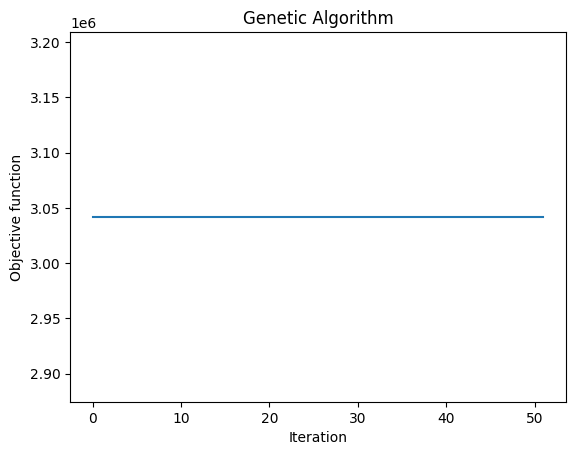

In [ ]:
# Define algorithm parameters
algorithm_param = {
    'max_num_iteration': 500,
    'population_size': 100,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': 50
}

# Create the genetic algorithm model
model = ga(
    function=fitness_function,
    dimension=3,
    variable_type='real',
    variable_boundaries=varbound,
    algorithm_parameters=algorithm_param
)

# Run the genetic algorithm
model.run()


In [ ]:
# Extract optimized parameters
k1_opt, k2_opt, T_ambient_opt = model.output_dict['variable']

print(f"Optimized k1: {k1_opt}")
print(f"Optimized k2: {k2_opt}")
print(f"Optimized T_ambient: {T_ambient_opt}")

Optimized k1: 0.908298432212105
Optimized k2: 0.5228716415048649
Optimized T_ambient: 45.42325381781842


In [ ]:
def fitness_function(params):
    k1, k2, T_ambient = params

    for i in range(len(df)):
        T_i = df['initial_coolant_temp'].iloc[i]
        delta_t = df['time'].iloc[i]
        Engine_Speed_i = df['Engine_speed'].iloc[i]
        Vehicle_Speed_i = df['Vehicle_Speed'].iloc[i]

        # Discretized model equation with overflow checks and clamping
        T_pred = T_i + delta_t * (k1 * Engine_Speed_i - k2 * Vehicle_Speed_i * (T_i - T_ambient))
        # print(T_pred)

    # Objective is to minimize the sum of squared errors (with overflow protection)
    residuals = T_pred - df['Coolant_temperature'].values
    sse = np.sum(np.square(residuals))

    return sse

MAE: 891487523.41 °C
RMSE: 1236573043.57 °C


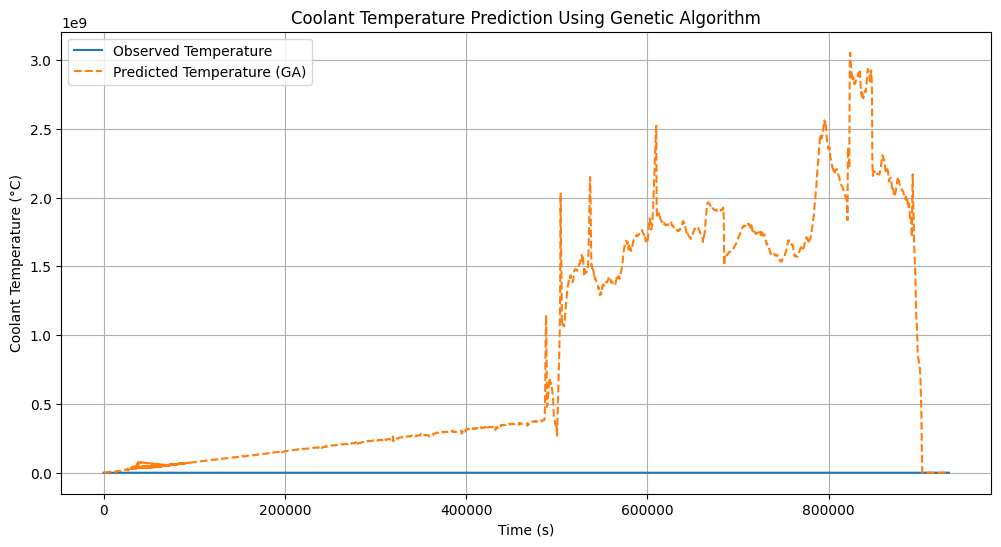

In [ ]:
# Calculate predicted coolant temperatures using optimized parameters
T_pred = np.zeros(len(df))
T_pred[0] = df['Coolant_temperature'].iloc[0]  # Initial coolant temperature

for i in range(len(df)):
    T_i = df['initial_coolant_temp'].iloc[i]
    delta_t = df['time'].iloc[i]
    Engine_Speed_i = df['Engine_speed'].iloc[i]
    Vehicle_Speed_i = df['Vehicle_Speed'].iloc[i]


    T_pred[i] = T_i + delta_t * (k1_opt * Engine_Speed_i - k2_opt * Vehicle_Speed_i * (T_i - T_ambient_opt))

df['T_predicted'] = T_pred

# Evaluate the model
mae = mean_absolute_error(df['Coolant_temperature'], df['T_predicted'])
rmse = np.sqrt(mean_squared_error(df['Coolant_temperature'], df['T_predicted']))

print(f"MAE: {mae:.2f} °C")
print(f"RMSE: {rmse:.2f} °C")

# Plot the observed and predicted coolant temperatures
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Coolant_temperature'], label='Observed Temperature')
plt.plot(df['time'], df['T_predicted'], label='Predicted Temperature (GA)', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Coolant Temperature (°C)')
plt.title('Coolant Temperature Prediction Using Genetic Algorithm')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df['T_predicted']

,T_predicted
0,3.200000e+01
1,6.493518e+05
2,1.184453e+06
3,1.669712e+06
4,2.112280e+06
...,...
1861,3.200000e+01
1862,3.200000e+01
1863,3.200000e+01
1864,3.200000e+01


# **HMM learn**

In [ ]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# For warnings
import warnings
warnings.filterwarnings("ignore")

# Function to preprocess data
def preprocess_data(df):
    # Handle missing values
    df.dropna(subset=['Coolant_temperature', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)'], inplace=True)

    # Bin Vehicle_Speed into intervals of 10 units
    speed_bins = np.arange(0, df['Vehicle_Speed'].max() + 10, 10)
    speed_labels = range(len(speed_bins) - 1)
    df['Speed_Binned'] = pd.cut(df['Vehicle_Speed'], bins=speed_bins, labels=speed_labels, right=False)
    df.dropna(subset=['Speed_Binned'], inplace=True)
    df['Speed_Binned'] = df['Speed_Binned'].astype(int)

    # Bin Coolant_temperature into intervals of 5 degrees
    temp_min = df['Coolant_temperature'].min()
    temp_max = df['Coolant_temperature'].max()
    temp_bins = np.arange(30, temp_max + 5, 5)
    temp_labels = range(len(temp_bins) - 1)
    df['Temp_Binned'] = pd.cut(df['Coolant_temperature'], bins=temp_bins, labels=temp_labels, right=False)
    df.dropna(subset=['Temp_Binned'], inplace=True)
    df['Temp_Binned'] = df['Temp_Binned'].astype(int)

    # Encode Gear Positions
    df['Gear_Position'] = df['Current_gear_shift_position_(Current_gear)'].astype(str)
    gear_encoder = LabelEncoder()
    df['Gear_Position_Encoded'] = gear_encoder.fit_transform(df['Gear_Position'])

    # Create combined observations
    df['Combined_Obs'] = df['Speed_Binned'].astype(str) + '_' + df['Gear_Position_Encoded'].astype(str)
    obs_encoder = LabelEncoder()
    df['Obs_Code'] = obs_encoder.fit_transform(df['Combined_Obs'])
    # print(df)
    return df, gear_encoder, obs_encoder, temp_bins, temp_labels

# Function to train HMM
def train_hmm(df):
    # Number of hidden states (number of temperature bins)
    n_components = df['Temp_Binned'].nunique()
    # Number of possible observations
    print(n_components)
    n_possible_obs = df['Obs_Code'].nunique()
    print(n_possible_obs)
    # Prepare observation sequence
    X = df['Obs_Code'].values.reshape(-1, 1)
    lengths = [len(X)]  # Since we have a single sequence

    # Initialize and train the HMM
    model = hmm.CategoricalHMM(n_components=n_components, n_iter=100, random_state=42,verbose=True)
    model.n_features = n_possible_obs  # Set the number of possible observations
    model.fit(X, lengths)

    return model

# Function to predict and evaluate on test data
def predict_and_evaluate(model, df_test, gear_encoder, obs_encoder, temp_bins, temp_labels):
    # Preprocess test data
    df_test = df_test.copy()
    df_test.dropna(subset=['Coolant_temperature', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)'], inplace=True)

    # Bin Vehicle_Speed
    speed_bins = np.arange(0, df_test['Vehicle_Speed'].max() + 10, 10)
    speed_labels = range(len(speed_bins) - 1)
    df_test['Speed_Binned'] = pd.cut(df_test['Vehicle_Speed'], bins=speed_bins, labels=speed_labels, right=False)
    df_test.dropna(subset=['Speed_Binned'], inplace=True)
    df_test['Speed_Binned'] = df_test['Speed_Binned'].astype(int)

    # Bin Coolant_temperature using the same bins as training data
    df_test['Temp_Binned'] = pd.cut(df_test['Coolant_temperature'], bins=temp_bins, labels=temp_labels, right=False)
    df_test.dropna(subset=['Temp_Binned'], inplace=True)
    df_test['Temp_Binned'] = df_test['Temp_Binned'].astype(int)

    # Encode Gear Positions using the same encoder
    df_test['Gear_Position'] = df_test['Current_gear_shift_position_(Current_gear)'].astype(str)
    df_test['Gear_Position_Encoded'] = gear_encoder.transform(df_test['Gear_Position'])

    # Create combined observations
    df_test['Combined_Obs'] = df_test['Speed_Binned'].astype(str) + '_' + df_test['Gear_Position_Encoded'].astype(str)

    # Map observations to codes using the same encoder
    # For unseen combinations, assign a special code
    new_obs = ~df_test['Combined_Obs'].isin(obs_encoder.classes_)
    df_test.loc[new_obs, 'Combined_Obs'] = 'unknown_obs'
    obs_encoder.classes_ = np.append(obs_encoder.classes_, 'unknown_obs')
    df_test['Obs_Code'] = obs_encoder.transform(df_test['Combined_Obs'])

    # Prepare observation sequence
    X_test = df_test['Obs_Code'].values.reshape(-1, 1)
    lengths_test = [len(X_test)]

    # Predict hidden states
    hidden_states = model.predict(X_test, lengths_test)
    df_test['Predicted_Temp_Bin'] = hidden_states

    # Map predicted temperature bins back to temperature ranges
    bin_intervals = pd.IntervalIndex(pd.cut(df_test['Coolant_temperature'], bins=temp_bins, right=False).cat.categories)
    bin_to_range = dict(enumerate(bin_intervals))
    df_test['Predicted_Temp_Range'] = df_test['Predicted_Temp_Bin'].map(bin_to_range)

    # For simplicity, take the midpoint of the temperature range as the predicted temperature
    df_test['Predicted_Coolant_Temperature'] = df_test['Predicted_Temp_Range'].apply(lambda x: x.mid)

    # Evaluate the model
    y_true = df_test['Coolant_temperature']
    y_pred = df_test['Predicted_Coolant_Temperature']
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"Mean Squared Error on Test Data: {mse:.2f}")
    print(f"Mean Absolute Error on Test Data: {mae:.2f}")

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df_test['time'], y_true, label='Actual Coolant Temperature')
    plt.plot(df_test['time'], y_pred, label='Predicted Coolant Temperature', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Coolant Temperature')
    plt.title('Actual vs Predicted Coolant Temperature on Test Data')
    plt.legend()
    plt.show()

    return df_test



In [ ]:
# Load training data from CSV
train_csv = '/content/Car_Dena_93 h 955 - ir 44_Data_08_17_2024, 00_01_00_to_09_17_2024, 08_18_00.xlsx'  # Replace with your training CSV file path
df_train = pd.read_excel(train_csv)
df_train = df_train[df_train['time'] >= 0]  # Filter out rows where time is negative
df_train = df_train[df_train['Coolant_temperature'] >= 0]





In [ ]:
df_train =df_train[['time', 'Coolant_temperature','Current_gear_shift_position_(Current_gear)','Vehicle_Speed']]

In [ ]:
df_train

,time,Coolant_temperature,Current_gear_shift_position_(Current_gear),Vehicle_Speed
0,337,32,13.0,0
1,837,32,13.0,0
2,1337,32,13.0,0
3,1837,32,13.0,0
4,2337,32,13.0,0
...,...,...,...,...
253667,1181026,82,13.0,0
253668,1181526,82,13.0,0
253669,1182026,82,13.0,0
253670,1182526,82,13.0,0


In [ ]:

# Preprocess training data
df_train_processed, gear_encoder, obs_encoder, temp_bins, temp_labels = preprocess_data(df_train)
print(df_train_processed)
# Train HMM

           time  Coolant_temperature  \
0           337                   32   
1           837                   32   
2          1337                   32   
3          1837                   32   
4          2337                   32   
...         ...                  ...   
253667  1181026                   82   
253668  1181526                   82   
253669  1182026                   82   
253670  1182526                   82   
253671  1183026                   82   

        Current_gear_shift_position_(Current_gear)  Vehicle_Speed  \
0                                             13.0              0   
1                                             13.0              0   
2                                             13.0              0   
3                                             13.0              0   
4                                             13.0              0   
...                                            ...            ...   
253667                              

In [ ]:
hmm_model = train_hmm(df_train_processed)


14
61


         1 -1052753.94502816             +nan
         2 -737637.19790908 +315116.74711909
         3 -655815.23813532  +81821.95977376
         4 -570945.13839827  +84870.09973705
         5 -509021.66854870  +61923.46984957
         6 -477556.26148394  +31465.40706476
         7 -461404.48342076  +16151.77806318
         8 -452803.16258045   +8601.32084032
         9 -450905.33059840   +1897.83198205
        10 -449926.20509332    +979.12550507
        12 -446634.16694200   +1184.75997674
        13 -444775.18696104   +1858.97998096
        14 -438821.58259325   +5953.60436779
        15 -429514.35599582   +9307.22659742
        16 -421721.64171118   +7792.71428464
        17 -415674.33870667   +6047.30300451
        18 -405645.72110929  +10028.61759738
        19 -399173.54828737   +6472.17282192
        20 -395867.38497223   +3306.16331514
        21 -391420.70190577   +4446.68306646
        22 -388762.87470216   +2657.82720361
        23 -388072.27487960    +690.59982256
        2

In [ ]:
# Load test data from CSV
test_csv = '/content/csv_data/trip_100_part_2.csv'  # Replace with your test CSV file path
df_test = pd.read_csv(test_csv)
df_test = df_test[df_test['time'] >= 0]  # Filter out rows where time is negative
df_test = df_test[df_test['Coolant_temperature'] >= 0]
# Predict and evaluate on test data


In [ ]:
def predict_and_evaluate(model, df_test, gear_encoder, obs_encoder, temp_bins, temp_labels):
    # Preprocess test data
    df_test = df_test.copy()
    df_test.dropna(subset=['Coolant_temperature', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)'], inplace=True)

    # Bin Vehicle_Speed
    speed_bins = np.arange(0, df_test['Vehicle_Speed'].max() + 10, 10)
    speed_labels = range(len(speed_bins) - 1)
    df_test['Speed_Binned'] = pd.cut(df_test['Vehicle_Speed'], bins=speed_bins, labels=speed_labels, right=False)
    df_test.dropna(subset=['Speed_Binned'], inplace=True)
    df_test['Speed_Binned'] = df_test['Speed_Binned'].astype(int)

    # Bin Coolant_temperature using the same bins as training data
    df_test['Temp_Binned'] = pd.cut(df_test['Coolant_temperature'], bins=temp_bins, labels=temp_labels, right=False)
    df_test.dropna(subset=['Temp_Binned'], inplace=True)
    df_test['Temp_Binned'] = df_test['Temp_Binned'].astype(int)

    # Encode Gear Positions using the same encoder
    df_test['Gear_Position'] = df_test['Current_gear_shift_position_(Current_gear)'].astype(str)

    # Handle unseen labels in Gear Position
    known_classes = set(gear_encoder.classes_)
    df_test['Gear_Position_Encoded'] = df_test['Gear_Position'].apply(lambda x: gear_encoder.transform([x])[0] if x in known_classes else -1)

    # Create combined observations
    df_test['Combined_Obs'] = df_test['Speed_Binned'].astype(str) + '_' + df_test['Gear_Position_Encoded'].astype(str)

    # Map observations to codes using the same encoder
    # For unseen combinations, assign a special code (e.g., map them to a known state like the most frequent state)
    unseen_mask = ~df_test['Combined_Obs'].isin(obs_encoder.classes_)
    if unseen_mask.any():
        df_test.loc[unseen_mask, 'Combined_Obs'] = 'unknown_obs'
        if 'unknown_obs' not in obs_encoder.classes_:
            obs_encoder.classes_ = np.append(obs_encoder.classes_, 'unknown_obs')
    df_test['Obs_Code'] = df_test['Combined_Obs'].apply(lambda x: obs_encoder.transform([x])[0] if x in obs_encoder.classes_ else 0)

    # Prepare observation sequence
    X_test = df_test['Obs_Code'].values.reshape(-1, 1)
    lengths_test = [len(X_test)]

    # Predict hidden states
    hidden_states = model.predict(X_test, lengths_test)
    df_test['Predicted_Temp_Bin'] = hidden_states

    # Map predicted temperature bins back to temperature ranges
    bin_intervals = pd.IntervalIndex(pd.cut(df_test['Coolant_temperature'], bins=temp_bins, right=False).cat.categories)
    bin_to_range = dict(enumerate(bin_intervals))
    df_test['Predicted_Temp_Range'] = df_test['Predicted_Temp_Bin'].map(bin_to_range)

    # For simplicity, take the midpoint of the temperature range as the predicted temperature
    df_test['Predicted_Coolant_Temperature'] = df_test['Predicted_Temp_Range'].apply(lambda x: x.mid)

    # Evaluate the model
    y_true = df_test['Coolant_temperature']
    y_pred = df_test['Predicted_Coolant_Temperature']
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"Mean Squared Error on Test Data: {mse:.2f}")
    print(f"Mean Absolute Error on Test Data: {mae:.2f}")

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df_test['time'], y_true, label='Actual Coolant Temperature')
    plt.plot(df_test['time'], y_pred, label='Predicted Coolant Temperature', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Coolant Temperature')
    plt.title('Actual vs Predicted Coolant Temperature on Test Data')
    plt.legend()
    plt.show()

    return df_test


Mean Squared Error on Test Data: 256.83
Mean Absolute Error on Test Data: 15.89


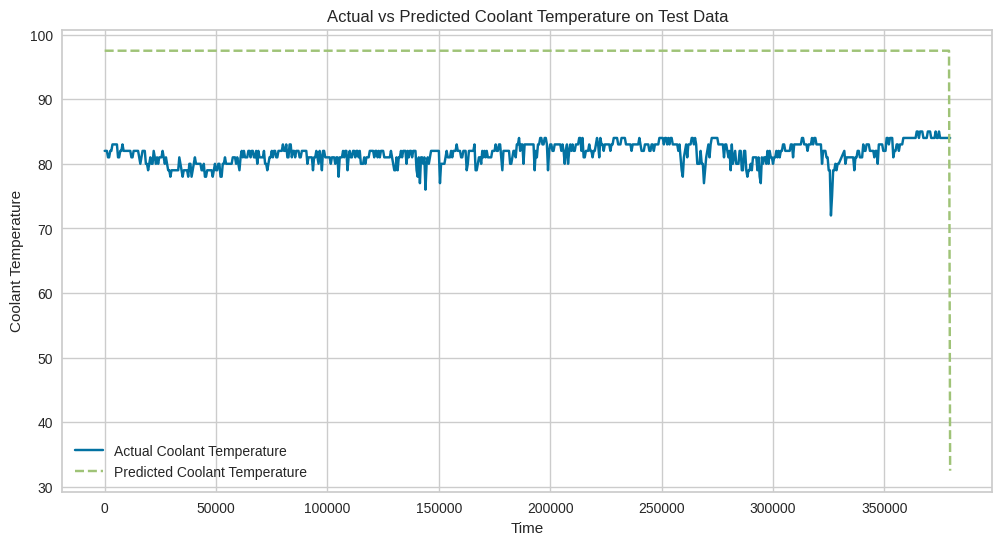

In [ ]:
df_test_results = predict_and_evaluate(hmm_model, df_test, gear_encoder, obs_encoder, temp_bins, temp_labels)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# For warnings
import warnings
warnings.filterwarnings("ignore")

# Function to preprocess data
def preprocess_data(df):
    # Handle missing values
    df.dropna(subset=['Coolant_temperature', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)'], inplace=True)

    # Bin Vehicle_Speed into intervals of 10 units
    speed_bins = np.arange(0, df['Vehicle_Speed'].max() + 10, 10)
    speed_labels = range(len(speed_bins) - 1)
    df['Speed_Binned'] = pd.cut(df['Vehicle_Speed'], bins=speed_bins, labels=speed_labels, right=False)
    df.dropna(subset=['Speed_Binned'], inplace=True)
    df['Speed_Binned'] = df['Speed_Binned'].astype(int)

    # Bin Coolant_temperature into intervals of 5 degrees
    temp_min = df['Coolant_temperature'].min()
    temp_max = df['Coolant_temperature'].max()
    temp_bins = np.arange(30, temp_max + 5, 5)
    temp_labels = range(len(temp_bins) - 1)
    df['Temp_Binned'] = pd.cut(df['Coolant_temperature'], bins=temp_bins, labels=temp_labels, right=False)
    df.dropna(subset=['Temp_Binned'], inplace=True)
    df['Temp_Binned'] = df['Temp_Binned'].astype(int)

    # Encode Gear Positions
    df['Gear_Position'] = df['Current_gear_shift_position_(Current_gear)'].astype(str)
    gear_encoder = LabelEncoder()
    df['Gear_Position_Encoded'] = gear_encoder.fit_transform(df['Gear_Position'])

    # Create combined observations
    df['Combined_Obs'] = df['Speed_Binned'].astype(str) + '_' + df['Gear_Position_Encoded'].astype(str)
    obs_encoder = LabelEncoder()
    df['Obs_Code'] = obs_encoder.fit_transform(df['Combined_Obs'])

    return df, gear_encoder, obs_encoder, temp_bins, temp_labels

# Function to train HMM
def train_hmm(df):
    # Number of hidden states (number of temperature bins)
    n_components = df['Temp_Binned'].nunique()
    # Number of possible observations
    n_possible_obs = df['Obs_Code'].nunique()

    # Prepare observation sequence
    X = df['Obs_Code'].values.reshape(-1, 1)
    lengths = [len(X)]  # Since we have a single sequence

    # Initialize and train the HMM using CategoricalHMM
    model = hmm.CategoricalHMM(n_components=n_components, n_iter=100, random_state=42)
    model.fit(X, lengths)

    return model

# Function to predict and evaluate on test data
def predict_and_evaluate(model, df_test, gear_encoder, obs_encoder, temp_bins, temp_labels):
    # Preprocess test data
    df_test = df_test.copy()
    df_test.dropna(subset=['Coolant_temperature', 'Vehicle_Speed', 'Current_gear_shift_position_(Current_gear)'], inplace=True)

    # Bin Vehicle_Speed
    speed_bins = np.arange(0, df_test['Vehicle_Speed'].max() + 10, 10)
    speed_labels = range(len(speed_bins) - 1)
    df_test['Speed_Binned'] = pd.cut(df_test['Vehicle_Speed'], bins=speed_bins, labels=speed_labels, right=False)
    df_test.dropna(subset=['Speed_Binned'], inplace=True)
    df_test['Speed_Binned'] = df_test['Speed_Binned'].astype(int)

    # Bin Coolant_temperature using the same bins as training data
    df_test['Temp_Binned'] = pd.cut(df_test['Coolant_temperature'], bins=temp_bins, labels=temp_labels, right=False)
    df_test.dropna(subset=['Temp_Binned'], inplace=True)
    df_test['Temp_Binned'] = df_test['Temp_Binned'].astype(int)

    # Encode Gear Positions using the same encoder
    df_test['Gear_Position'] = df_test['Current_gear_shift_position_(Current_gear)'].astype(str)
    df_test['Gear_Position_Encoded'] = gear_encoder.transform(df_test['Gear_Position'])

    # Create combined observations
    df_test['Combined_Obs'] = df_test['Speed_Binned'].astype(str) + '_' + df_test['Gear_Position_Encoded'].astype(str)

    # Map observations to codes using the same encoder
    # For unseen combinations, assign a special code
    unseen_mask = ~df_test['Combined_Obs'].isin(obs_encoder.classes_)
    if unseen_mask.any():
        df_test.loc[unseen_mask, 'Combined_Obs'] = 'unknown_obs'
        if 'unknown_obs' not in obs_encoder.classes_:
            obs_encoder.classes_ = np.append(obs_encoder.classes_, 'unknown_obs')
    df_test['Obs_Code'] = obs_encoder.transform(df_test['Combined_Obs'])

    # Prepare observation sequence
    X_test = df_test['Obs_Code'].values.reshape(-1, 1)
    lengths_test = [len(X_test)]

    # Predict hidden states
    hidden_states = model.predict(X_test, lengths_test)
    df_test['Predicted_Temp_Bin'] = hidden_states

    # Map predicted temperature bins back to temperature ranges
    bin_intervals = pd.IntervalIndex(pd.cut(df_test['Coolant_temperature'], bins=temp_bins, right=False).cat.categories)
    bin_to_range = dict(enumerate(bin_intervals))
    df_test['Predicted_Temp_Range'] = df_test['Predicted_Temp_Bin'].map(bin_to_range)

    # For simplicity, take the midpoint of the temperature range as the predicted temperature
    df_test['Predicted_Coolant_Temperature'] = df_test['Predicted_Temp_Range'].apply(lambda x: x.mid)

    # Evaluate the model
    y_true = df_test['Coolant_temperature']
    y_pred = df_test['Predicted_Coolant_Temperature']
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"Mean Squared Error on Test Data: {mse:.2f}")
    print(f"Mean Absolute Error on Test Data: {mae:.2f}")

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df_test['time'], y_true, label='Actual Coolant Temperature')
    plt.plot(df_test['time'], y_pred, label='Predicted Coolant Temperature', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Coolant Temperature')
    plt.title('Actual vs Predicted Coolant Temperature on Test Data')
    plt.legend()
    plt.show()

    return df_test

# Main execution
if __name__ == "__main__":
    # Load training data from CSV
    train_csv = 'train_data.csv'  # Replace with your training CSV file path
    df_train = pd.read_csv(train_csv)

    # Preprocess training data
    df_train_processed, gear_encoder, obs_encoder, temp_bins, temp_labels = preprocess_data(df_train)

    # Train HMM
    hmm_model = train_hmm(df_train_processed)

    # Load test data from CSV
    test_csv = 'test_data.csv'  # Replace with your test CSV file path
    df_test = pd.read_csv(test_csv)

    # Predict and evaluate on test data
    df_test_results = predict_and_evaluate(hmm_model, df_test, gear_encoder, obs_encoder, temp_bins, temp_labels)


# **New**

In [ ]:
folder_path = 'path_to_your_folder'  # Replace with the actual folder path

# List to hold data from each file
data_frames = []

# Iterate through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        # Read each CSV file into a DataFrame
        df = pd.read_csv(file_path)
        data_frames.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
print(combined_df)

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed,Vehicle_speed_mps,delta_t
0,328,2024-09-05 20:07:04,2024-09-05 20:06:25,58,0,True,9.643,7.804,37,4.424,...,NaN,NaN,0,0.000000,0.000000,0,242.65,-0.014048,0.0,0.0
1,328,2024-09-04 09:25:11,2024-09-04 09:24:38,53,0,True,8.857,5.725,28,3.420,...,NaN,NaN,0,0.000000,0.000000,0,242.65,0.021857,0.0,0.0
2,328,2024-09-14 17:18:49,2024-09-14 17:18:16,107,0,True,9.714,1.529,34,4.125,...,NaN,NaN,0,0.000000,0.000000,0,244.91,-0.001004,0.0,0.0
3,328,2024-09-02 12:04:33,2024-09-02 12:03:59,41,0,True,9.714,8.392,36,4.568,...,NaN,NaN,0,0.000000,0.000000,0,242.65,0.000021,0.0,0.0
4,329,2024-09-01 21:38:54,2024-09-01 21:38:20,32,0,True,8.857,3.529,33,4.549,...,NaN,NaN,0,0.000000,0.000000,0,244.92,-0.002139,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253249,22252620,2024-09-02 06:36:29,2024-09-02 04:23:56,40,48,False,0.000,85.468,105,7.629,...,NaN,NaN,2,37.379761,49.568424,12,270.00,0.000000,0.0,500.0
253250,22253120,2024-09-02 04:23:59,2024-09-02 04:23:58,40,51,True,0.000,85.470,105,7.596,...,NaN,NaN,2,37.379761,49.568424,12,270.00,0.000000,0.0,500.0
253251,22253620,2024-09-02 04:23:59,2024-09-02 04:23:58,40,51,True,0.000,85.472,105,7.629,...,NaN,NaN,2,37.379761,49.568424,12,270.00,0.000000,0.0,500.0
253252,22254120,2024-09-02 04:23:59,2024-09-02 04:23:58,40,51,True,0.000,85.474,105,7.520,...,NaN,NaN,2,37.379761,49.568424,12,270.00,0.000000,0.0,500.0


In [ ]:
combined_df

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed,initial_coolant_temp
0,0,2024-09-01 14:26:04,2024-09-01 14:24:57,14,0,True,9.643,4.118,46,11.291,...,NaN,NaN,NaN,0,0.000000,0.000000,0,244.92,-0.001817,80
1,500,2024-09-01 14:26:04,2024-09-01 14:24:57,14,0,True,9.643,8.255,30,5.688,...,NaN,NaN,NaN,0,0.000000,0.000000,0,244.92,0.000000,80
2,1000,2024-09-01 14:26:04,2024-09-01 14:24:57,14,0,True,9.571,14.920,28,5.324,...,NaN,NaN,NaN,0,0.000000,0.000000,0,244.92,0.000000,80
3,1500,2024-09-01 14:26:04,2024-09-01 14:24:57,14,0,True,9.643,20.016,27,3.906,...,NaN,NaN,NaN,0,0.000000,0.000000,0,244.92,0.000000,80
4,2000,2024-09-01 14:36:37,2024-09-01 14:24:59,14,0,False,9.571,22.446,59,13.445,...,NaN,NaN,NaN,0,0.000000,0.000000,0,244.92,0.000000,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,497492,2024-09-15 11:01:23,2024-09-15 11:01:15,112,70,True,9.571,80.382,33,4.086,...,NaN,NaN,NaN,1223,35.717541,51.199665,12,103.07,0.000000,60
58996,497992,2024-09-15 11:07:39,2024-09-15 11:01:17,112,70,False,9.571,79.363,34,4.061,...,NaN,NaN,NaN,1223,35.717518,51.199772,12,104.83,0.061436,60
58997,498492,2024-09-15 11:07:39,2024-09-15 11:01:17,112,70,False,9.643,77.584,33,4.262,...,NaN,NaN,NaN,1223,35.717518,51.199772,12,104.83,0.000000,60
58998,498992,2024-09-15 11:07:39,2024-09-15 11:01:17,112,70,False,9.714,79.198,29,4.434,...,NaN,NaN,NaN,1223,35.717518,51.199772,12,104.83,0.000000,60


In [ ]:
combined_df = pd.read_csv('/content/csv_data/trip_1.csv')
combined_df

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed,initial_coolant_temp
0,0,2024-08-18 17:15:06,2024-08-18 17:14:34,1,0,True,8.857,2.431,28,6.154,...,NaN,NaN,NaN,0,0.000000,0.000000,0,0.0,NaN,32
1,500,2024-08-18 17:15:06,2024-08-18 17:14:34,1,0,True,9.500,4.620,31,7.055,...,NaN,NaN,NaN,0,0.000000,0.000000,0,0.0,0.0,32
2,1000,2024-08-18 17:15:06,2024-08-18 17:14:34,1,0,True,9.429,6.589,30,6.291,...,NaN,NaN,NaN,0,0.000000,0.000000,0,0.0,0.0,32
3,1500,2024-08-18 17:15:06,2024-08-18 17:14:34,1,0,True,9.429,8.361,31,5.998,...,NaN,NaN,NaN,0,0.000000,0.000000,0,0.0,0.0,32
4,2000,2024-08-18 17:44:16,2024-08-18 17:14:36,1,0,False,9.357,9.957,33,6.018,...,NaN,NaN,NaN,0,0.000000,0.000000,0,0.0,0.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,930720,2024-08-18 17:29:33,2024-08-18 17:29:31,1,100,True,8.786,18.102,88,7.576,...,NaN,NaN,NaN,1268,35.720936,51.183571,11,0.0,0.0,32
1862,931220,2024-08-18 17:29:33,2024-08-18 17:29:31,1,100,True,8.786,18.213,88,7.592,...,NaN,NaN,NaN,1268,35.720936,51.183571,11,0.0,0.0,32
1863,931720,2024-08-18 17:29:33,2024-08-18 17:29:31,1,100,True,8.786,18.314,88,7.592,...,NaN,NaN,NaN,1268,35.720936,51.183571,11,0.0,0.0,32
1864,932220,2024-08-18 17:29:35,2024-08-18 17:29:33,1,100,True,8.786,18.286,88,7.631,...,NaN,NaN,NaN,1268,35.720936,51.183571,11,0.0,0.0,32


In [ ]:
df =combined_df
df

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,0348,0409,040a,altitude,latitude,longitude,satelites,bearing,angular_speed,initial_coolant_temp
0,0,2024-08-18 17:15:06,2024-08-18 17:14:34,1,0,True,8.857,2.431,28,6.154,...,NaN,NaN,NaN,0,0.000000,0.000000,0,0.0,NaN,32
1,500,2024-08-18 17:15:06,2024-08-18 17:14:34,1,0,True,9.500,4.620,31,7.055,...,NaN,NaN,NaN,0,0.000000,0.000000,0,0.0,0.0,32
2,1000,2024-08-18 17:15:06,2024-08-18 17:14:34,1,0,True,9.429,6.589,30,6.291,...,NaN,NaN,NaN,0,0.000000,0.000000,0,0.0,0.0,32
3,1500,2024-08-18 17:15:06,2024-08-18 17:14:34,1,0,True,9.429,8.361,31,5.998,...,NaN,NaN,NaN,0,0.000000,0.000000,0,0.0,0.0,32
4,2000,2024-08-18 17:44:16,2024-08-18 17:14:36,1,0,False,9.357,9.957,33,6.018,...,NaN,NaN,NaN,0,0.000000,0.000000,0,0.0,0.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,930720,2024-08-18 17:29:33,2024-08-18 17:29:31,1,100,True,8.786,18.102,88,7.576,...,NaN,NaN,NaN,1268,35.720936,51.183571,11,0.0,0.0,32
1862,931220,2024-08-18 17:29:33,2024-08-18 17:29:31,1,100,True,8.786,18.213,88,7.592,...,NaN,NaN,NaN,1268,35.720936,51.183571,11,0.0,0.0,32
1863,931720,2024-08-18 17:29:33,2024-08-18 17:29:31,1,100,True,8.786,18.314,88,7.592,...,NaN,NaN,NaN,1268,35.720936,51.183571,11,0.0,0.0,32
1864,932220,2024-08-18 17:29:35,2024-08-18 17:29:33,1,100,True,8.786,18.286,88,7.631,...,NaN,NaN,NaN,1268,35.720936,51.183571,11,0.0,0.0,32


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Load your dataset (replace 'your_file.csv' with the actual file path)


# Assuming you have 'Engine_Speed' and 'Vehicle_Speed' columns, and the time step 'delta_t'
delta_t = 1  # Modify this based on your actual time step in the dataset
# initial_temperature = df['initial_coolant_temp'] # Starting temperature

In [ ]:
len(df)

1866

In [ ]:
def objective_function(params, df, delta_t):
    k1, k2, T_ambient = params
    predicted_temperatures = []

    # Loop through the dataframe to predict temperatures step by step
    for i in range(len(df)):
        # Use the initial coolant temperature from the 'initial_coolant_temp' column for each row
        T_i = df['initial_coolant_temp'].iloc[i]
        Engine_Speed_i = df['Engine_speed'].iloc[i]
        Vehicle_Speed_i = df['Vehicle_Speed'].iloc[i]
        delta_t = df['time'].iloc[i]
        # Use the formula to predict the next temperature
        T_pred_i = T_i + delta_t * (k1 * Engine_Speed_i - k2 * Vehicle_Speed_i * (T_i - T_ambient))
        if np.isnan(T_pred_i) or np.isinf(T_pred_i):
            print(f"NaN or Inf encountered at step {i}, T_pred_i: {T_pred_i}")
            print(T_i,Engine_Speed_i,Vehicle_Speed_i)
            return np.inf
        # print(Engine_Speed_i,Vehicle_Speed_i)
        predicted_temperatures.append(T_pred_i)
    # print(i )
    # Convert predicted temperatures to a numpy array
    predicted_temperatures = np.array(predicted_temperatures)

    # Ensure that both actual and predicted temperatures have the same length
    actual_temperatures = df['Coolant_temperature'].values[:len(predicted_temperatures)]

    # Calculate the squared error between predicted and actual temperatures
    return np.sum(((predicted_temperatures - actual_temperatures)**2))


# Initial guesses for k1, k2, and T_ambient
initial_guesses = [1, 1, 25]

# Minimize the objective function to find the optimal k1, k2, and T_ambient
result = minimize(objective_function, initial_guesses, args=(df, delta_t), method='BFGS',options={'disp': True})

# Extract the optimized parameters
k1_opt, k2_opt, T_ambient_opt = result.x

# Display the results
print(f"Optimized k1: {k1_opt}")
print(f"Optimized k2: {k2_opt}")
print(f"Optimized Ambient Temperature: {T_ambient_opt}")


         Current function value: 2547781.477950
         Iterations: 12
         Function evaluations: 292
         Gradient evaluations: 70
Optimized k1: -4.4192706539978365e-08
Optimized k2: -2.2005538079620266e-07
Optimized Ambient Temperature: 21.87978160262889


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1866,) + inhomogeneous part.

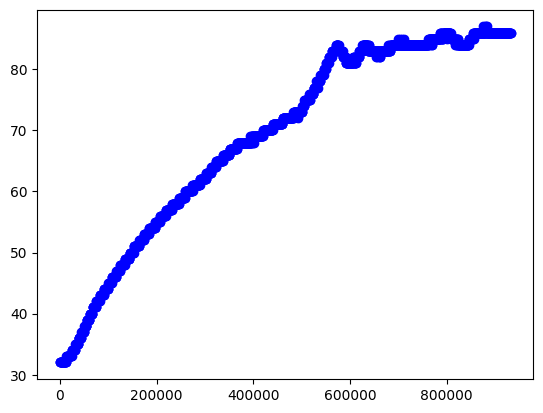

In [ ]:
predicted_temperatures = []
# Plot actual vs predicted temperatures for validation
predicted_temperatures = [initial_temperature]
for i in range(len(df)-1):
    T_i = df['initial_coolant_temp'].iloc[i]
    Engine_Speed_i = df['Engine_speed'].iloc[i]
    Vehicle_Speed_i = df['Vehicle_Speed'].iloc[i]
    delta_t = df['time'].iloc[i]
    T_pred_i = T_i + delta_t * (k1_opt * Engine_Speed_i - k2_opt * Vehicle_Speed_i * (T_i - T_ambient_opt))
    if isinstance(T_pred_i, (list, np.ndarray)):
        print(f"Error: T_pred_i is a sequence at index {i}. T_pred_i: {T_pred_i}")
        continue  # Skip appending if it's not a scalar

    predicted_temperatures.append(T_pred_i)

# Convert predicted_temperatures to a flat array and ensure the shape is correct
# predicted_temperatures = np.array(predicted_temperatures).flatten()
import matplotlib.pyplot as plt

plt.plot(df['time'], df['Coolant_temperature'], 'bo', label='Actual Coolant Temp')
plt.plot(df['time'], predicted_temperatures, 'r-', label='Predicted Coolant Temp')
plt.xlabel('Time')
plt.ylabel('Coolant Temperature')
plt.legend()
plt.show()


In [ ]:
len(predicted_temperatures)

1866

In [ ]:
len(df['Coolant_temperature'])

1866

In [ ]:
result.x

array([ 1.,  1., 25.])

# **GPR ready daaset**

In [3]:
import pandas as pd

In [4]:
df2 = pd.read_csv('/content/combined_trips_find_time_index.csv')

In [24]:
df_filtered = trip_data

In [25]:
df_filtered

,time,timestamp_received,timestamp,trip,signal,isLive,Battery_voltage,Fuel_level,Intake_manifold_absolute_pressure,Throttle_position,...,Trip_fuel_consumption,RON_factor,altitude,latitude,longitude,satelites,bearing,angular_speed,correct_altitude,slope
0,56700,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.286,4.392,80,22.244,...,32844.672,0.063,0,0.000000,0.000000,0,0.0,NaN,1246,0.0
1,57200,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.286,8.188,89,27.832,...,33470.578,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
2,57700,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.214,11.762,97,35.512,...,34428.625,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
3,58200,2024-09-08 08:09:05,2024-09-08 08:09:00,1,80,True,9.286,14.821,106,38.049,...,35539.359,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
4,58700,2024-09-08 08:26:56,2024-09-08 08:09:02,1,80,False,9.286,17.574,114,37.062,...,36941.219,0.063,0,0.000000,0.000000,0,0.0,0.0,1246,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,1098195,2024-09-08 08:26:21,2024-09-08 08:26:20,1,93,True,0.000,38.874,90,7.490,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0
2084,1098695,2024-09-08 08:26:23,2024-09-08 08:26:22,1,90,True,0.000,38.869,90,7.490,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0
2085,1099195,2024-09-08 08:26:23,2024-09-08 08:26:22,1,90,True,0.000,38.864,90,7.436,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0
2086,1099695,2024-09-08 08:26:23,2024-09-08 08:26:22,1,90,True,0.000,38.860,90,7.434,...,1053172.875,0.046,1256,35.707153,51.267391,12,180.0,0.0,1246,0.0


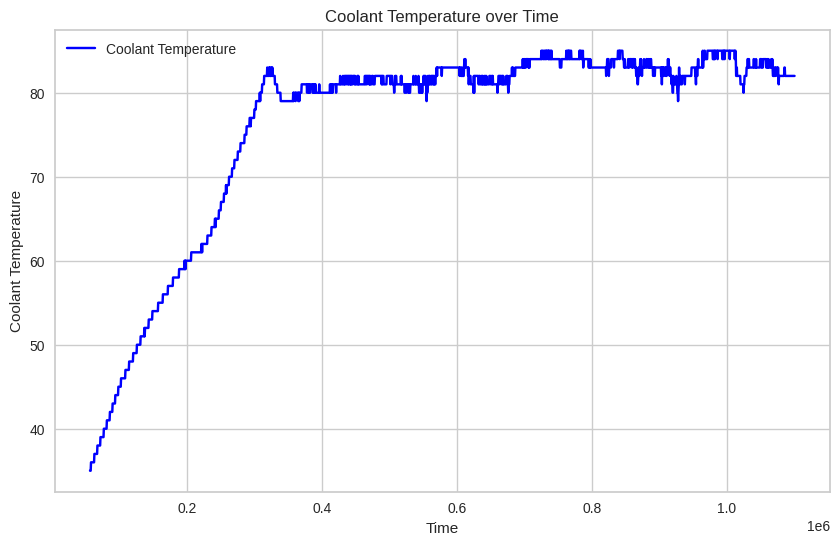

In [26]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called df_filtered and the columns are 'time' and 'Coolant_temperature'
plt.figure(figsize=(10, 6))

# Plot time on x-axis and Coolant_temperature on y-axis
plt.plot(df_filtered['time'], df_filtered['Coolant_temperature'], color='blue', label='Coolant Temperature')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Coolant Temperature')
plt.title('Coolant Temperature over Time')

# Optional: Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


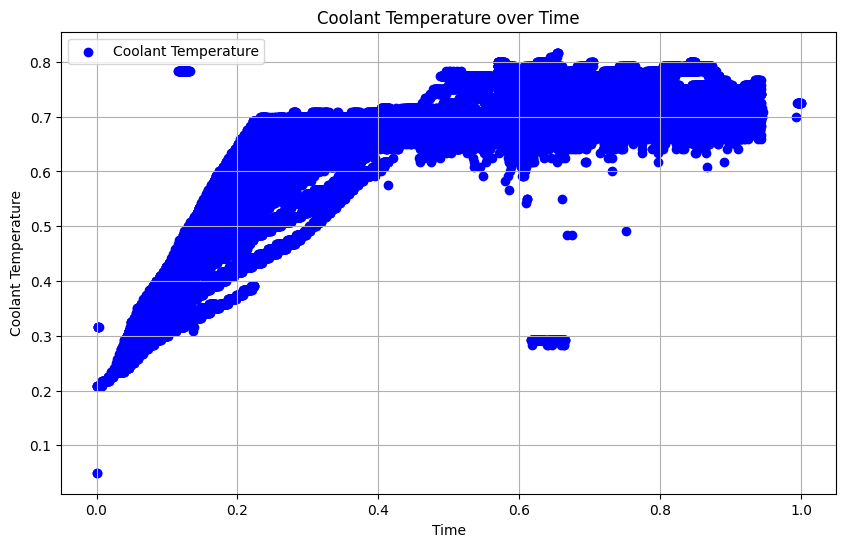

In [34]:
# Assuming your dataframe is called df_filtered and the columns are 'time' and 'Coolant_temperature'
plt.figure(figsize=(10, 6))

# Plot time on x-axis and Coolant_temperature on y-axis
plt.scatter(df_filtered['time'], df_filtered['Coolant_temperature'], color='blue', label='Coolant Temperature')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Coolant Temperature')
plt.title('Coolant Temperature over Time')

# Optional: Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot


In [27]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})

In [28]:
df_filtered = df_filtered[['time', 'Coolant_temperature','Vehicle_Speed','Current_gear_shift_position_(Current_gear)']]

In [29]:
df_filtered.describe()

,time,Coolant_temperature,Vehicle_Speed,Current_gear_shift_position_(Current_gear)
count,2.088000e+03,2088.000000,2088.000000,2088.000000
mean,5.784487e+05,76.301724,42.664272,2.902778
std,3.014474e+05,12.226028,29.973057,1.628870
min,5.670000e+04,35.000000,0.000000,0.000000
25%,3.175750e+05,79.000000,15.000000,2.000000
50%,5.784480e+05,82.000000,40.000000,3.000000
75%,8.393230e+05,83.000000,68.000000,4.000000
max,1.100195e+06,85.000000,102.000000,6.000000


In [9]:
1.335623e+06

1335623.0

In [30]:
df_filtered['time'] = df_filtered['time']/1335623.0

In [31]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = (df_filtered['Current_gear_shift_position_(Current_gear)']/6).round(2)

In [32]:
df_filtered['Vehicle_Speed'] = (df_filtered['Vehicle_Speed']/150).round(2)

In [33]:
df_filtered['Coolant_temperature'] = df_filtered['Coolant_temperature']/120

In [12]:
df_filtered['initial_coolant_temp'] = df_filtered['initial_coolant_temp']/120

KeyError: 'initial_coolant_temp'

# GPR model scikit

In [13]:
df_filtered

,time,Coolant_temperature,Vehicle_Speed,Current_gear_shift_position_(Current_gear)
0,0.569172,0.758333,0.0,0.0
1,0.569546,0.758333,0.0,0.0
2,0.569921,0.758333,0.0,0.0
3,0.570295,0.758333,0.0,0.0
4,0.570669,0.758333,0.0,0.0
...,...,...,...,...
93068,0.587141,0.716667,0.0,0.0
93069,0.587515,0.716667,0.0,0.0
93070,0.587890,0.716667,0.0,0.0
93071,0.588264,0.716667,0.0,0.0


In [14]:
df_filtered.describe()

,time,Coolant_temperature,Vehicle_Speed,Current_gear_shift_position_(Current_gear)
count,93073.000000,93073.000000,93073.000000,93073.000000
mean,0.449974,0.631013,0.193880,0.351274
std,0.246581,0.124495,0.191495,0.287942
min,0.000000,0.050000,0.000000,0.000000
25%,0.241011,0.591667,0.000000,0.000000
50%,0.413173,0.675000,0.150000,0.330000
75%,0.652671,0.708333,0.350000,0.670000
max,1.000000,0.816667,0.800000,2.170000


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [36]:

# 1. Data Preparation
X = df_filtered.drop('Coolant_temperature', axis=1).values
y = df_filtered['Coolant_temperature'].values

# Reduce dataset size
X_small, _, y_small, _ = train_test_split(
    X, y, train_size=10000, random_state=42
)
# X_small = X
# y_small = y
# Feature Scaling
# scaler = StandardScaler()
X_small_scaled = X_small

# 2. Define the Kernel
# kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# 3. Initialize the Gaussian Process Regressor
gpr = GaussianProcessRegressor(
  # Reduced from 10 to save memory
    alpha=1e-2,
    normalize_y=False,  # Disable caching to save memory
  # Enable verbose to monitor progress
)

# 4. Train the Model
gpr.fit(X_small_scaled, y_small)
# 7. Save the Model and Scaler
model_filename = 'best_coolant_temperature_model_gpr_reduced.pkl'
# scaler_filename = 'scaler_reduced.pkl'
joblib.dump(gpr, model_filename)
# joblib.dump(scaler, scaler_filename)
print(f"Best model saved as {model_filename}")
# print(f"Scaler saved as {scaler_filename}")


Best model saved as best_coolant_temperature_model_gpr_reduced.pkl


In [17]:
gpr

GaussianProcessRegressor(alpha=0.01)

In [18]:
# 5. Make Predictions on a Test Set
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.01, random_state=42
)

y_pred = gpr.predict(X_test)

# 6. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gaussian Process Regressor Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Gaussian Process Regressor Performance:
Mean Squared Error: 0.0008
R^2 Score: 0.9458


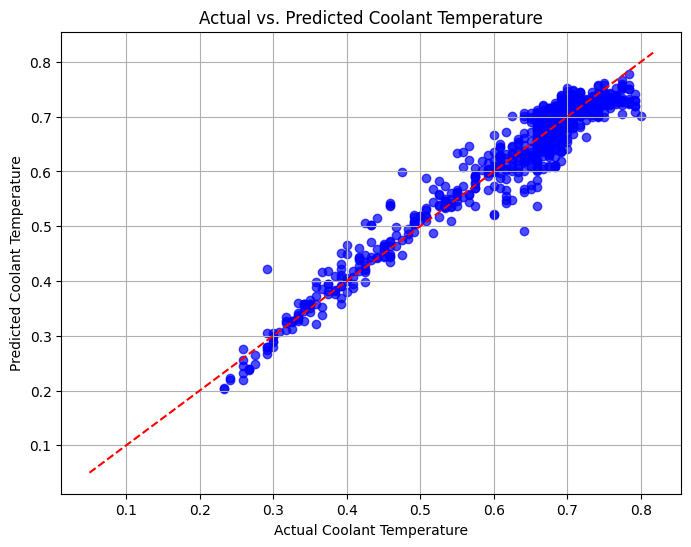

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual Coolant Temperature')
plt.ylabel('Predicted Coolant Temperature')
plt.title('Actual vs. Predicted Coolant Temperature')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.show()


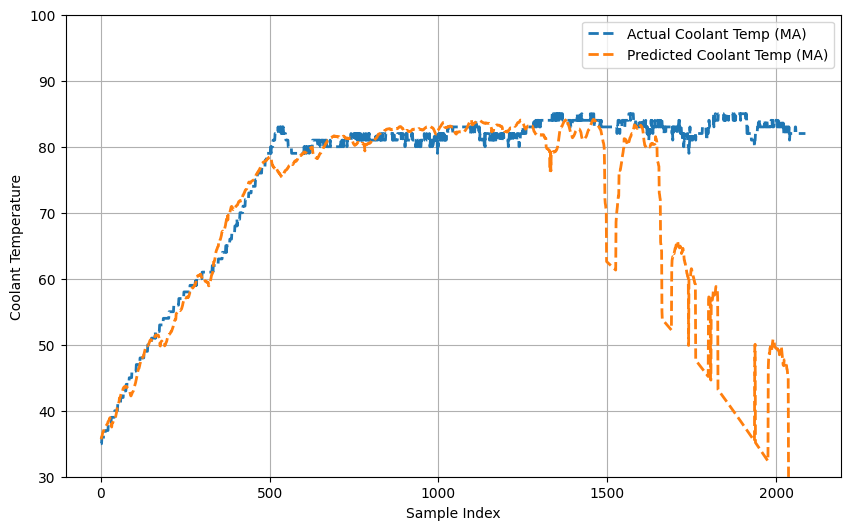

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(y*120, label='Actual Coolant Temp (MA)', linestyle='--', linewidth=2)
plt.plot(y_pred*120, label='Predicted Coolant Temp (MA)', linestyle='--', linewidth=2)

plt.xlabel('Sample Index')
plt.ylabel('Coolant Temperature')
plt.ylim(30, 100)
plt.legend()
plt.grid(True)
plt.show()

test gpr

In [115]:
df2 = pd.read_csv('/content/NEDC_1000_slope_added_with_gear.csv')
df2.columns

Index(['Time', 'Speed', 'Accelerator pedal position', 'Throttle position',
       'FC_avg_rate', 'Engine speed', 'Trip fuel consumption', 'slope',
       'Unnamed: 8', 'gear'],
      dtype='object')

In [116]:
df2

,Time,Speed,Accelerator pedal position,Throttle position,FC_avg_rate,Engine speed,Trip fuel consumption,slope,Unnamed: 8,gear
0,1,0.0,0.0,8.654542,0.000000,0.000,0.0000,0,#DIV/0!,0
1,2,0.0,0.0,8.654650,0.000000,0.000,0.0000,0,#DIV/0!,0
2,3,0.0,0.0,8.648169,0.000000,0.000,0.0000,0,#DIV/0!,0
3,4,0.0,0.0,8.651409,0.000000,0.000,0.0000,0,#DIV/0!,0
4,5,0.0,0.0,8.653678,0.000000,0.000,0.0000,0,#DIV/0!,0
...,...,...,...,...,...,...,...,...,...,...
1233,1215,0.0,0.0,1.016505,0.109375,322.125,812961.5313,0,0,0
1234,1216,0.0,0.0,8.150381,0.109375,322.125,812961.5313,0,0,0
1235,1216,0.0,0.0,8.730512,0.109375,322.125,812961.5313,0,0,0
1236,1217,0.0,0.0,8.738776,0.109375,322.125,812961.5313,0,0,0


In [118]:
# Subtract the first row's time from all rows to start from 0
initial_time = df2['Time'].iloc[0]
df2['Time'] = df2['Time'] - initial_time

# Add a column with the initial coolant temperature (from the first row)

df2['initial_coolant_temp'] = 30

In [119]:
df_filtered = df2
df_filtered

,Time,Speed,Accelerator pedal position,Throttle position,FC_avg_rate,Engine speed,Trip fuel consumption,slope,Unnamed: 8,gear,initial_coolant_temp
0,0,0.0,0.0,8.654542,0.000000,0.000,0.0000,0,#DIV/0!,0,30
1,1,0.0,0.0,8.654650,0.000000,0.000,0.0000,0,#DIV/0!,0,30
2,2,0.0,0.0,8.648169,0.000000,0.000,0.0000,0,#DIV/0!,0,30
3,3,0.0,0.0,8.651409,0.000000,0.000,0.0000,0,#DIV/0!,0,30
4,4,0.0,0.0,8.653678,0.000000,0.000,0.0000,0,#DIV/0!,0,30
...,...,...,...,...,...,...,...,...,...,...,...
1233,1214,0.0,0.0,1.016505,0.109375,322.125,812961.5313,0,0,0,30
1234,1215,0.0,0.0,8.150381,0.109375,322.125,812961.5313,0,0,0,30
1235,1215,0.0,0.0,8.730512,0.109375,322.125,812961.5313,0,0,0,30
1236,1216,0.0,0.0,8.738776,0.109375,322.125,812961.5313,0,0,0,30


In [73]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)'].replace({13: 0, 14: 1})

In [89]:
df_filtered = df_filtered[['time', 'Coolant_temperature','initial_coolant_temp','Vehicle_Speed','Current_gear_shift_position_(Current_gear)']]

In [120]:
df_filtered = df_filtered[['Time', 'initial_coolant_temp','Speed','gear']]

In [121]:
df_filtered.describe()

,Time,initial_coolant_temp,Speed,gear
count,1238.000000,1238.0,1238.000000,1238.000000
mean,607.756058,30.0,31.122007,2.148627
std,351.290539,0.0,30.513282,1.819825
min,0.000000,30.0,0.000000,0.000000
25%,304.250000,30.0,0.000000,0.000000
50%,607.500000,30.0,29.266904,2.000000
75%,910.750000,30.0,48.838496,4.000000
max,1217.000000,30.0,118.303374,5.000000


In [122]:
df_filtered['Time'] = df_filtered['Time']/1000

<ipython-input-122-44ae97766baa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Time'] = df_filtered['Time']/1000


In [76]:
df_filtered['time'] = df_filtered['time']/1000000

<ipython-input-76-6fc7733333f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time'] = df_filtered['time']/1000000


In [78]:
df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)']/6

<ipython-input-78-a20eee7d8cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Current_gear_shift_position_(Current_gear)'] = df_filtered['Current_gear_shift_position_(Current_gear)']/6


In [123]:
df_filtered['gear'] = df_filtered['gear']/6

<ipython-input-123-4e21af5a2265>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gear'] = df_filtered['gear']/6


In [79]:
df_filtered['Vehicle_Speed'] = df_filtered['Vehicle_Speed']/150

<ipython-input-79-ed9255c29c6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Vehicle_Speed'] = df_filtered['Vehicle_Speed']/150


In [124]:
df_filtered['Speed'] = df_filtered['Speed']/150

<ipython-input-124-43bef74b5689>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Speed'] = df_filtered['Speed']/150


In [80]:
df_filtered['Coolant_temperature'] = df_filtered['Coolant_temperature']/120

<ipython-input-80-5599a9684f76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Coolant_temperature'] = df_filtered['Coolant_temperature']/120


In [125]:
df_filtered['initial_coolant_temp'] = df_filtered['initial_coolant_temp']/120

<ipython-input-125-38a7e39a182f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['initial_coolant_temp'] = df_filtered['initial_coolant_temp']/120


In [126]:
df_filtered

,Time,initial_coolant_temp,Speed,gear
0,0.000,0.25,0.0,0.0
1,0.001,0.25,0.0,0.0
2,0.002,0.25,0.0,0.0
3,0.003,0.25,0.0,0.0
4,0.004,0.25,0.0,0.0
...,...,...,...,...
1233,1.214,0.25,0.0,0.0
1234,1.215,0.25,0.0,0.0
1235,1.215,0.25,0.0,0.0
1236,1.216,0.25,0.0,0.0


In [82]:
X = df_filtered.drop('Coolant_temperature', axis=1).values
y = df_filtered['Coolant_temperature'].values
y_pred = gpr.predict(X)

# 6. Evaluate the Model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Gaussian Process Regressor Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Gaussian Process Regressor Performance:
Mean Squared Error: 0.0303
R^2 Score: -88.9148


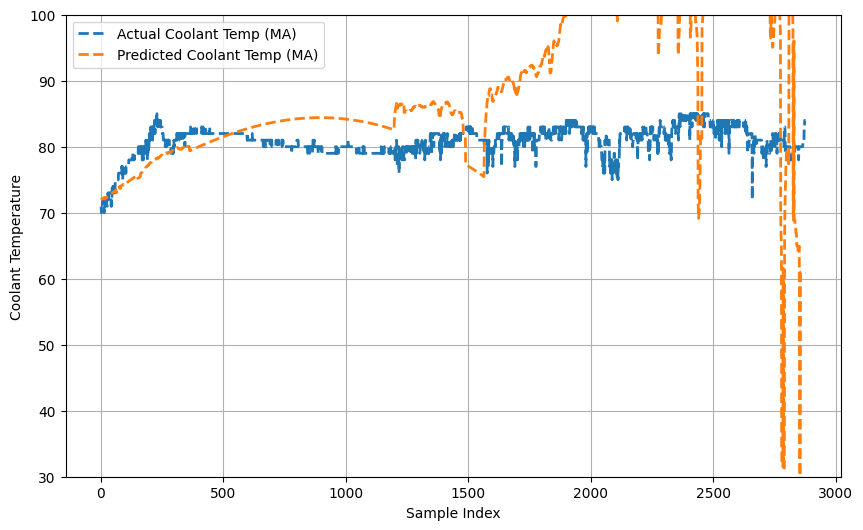

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(y*120, label='Actual Coolant Temp (MA)', linestyle='--', linewidth=2)
plt.plot(y_pred*120, label='Predicted Coolant Temp (MA)', linestyle='--', linewidth=2)

plt.xlabel('Sample Index')
plt.ylabel('Coolant Temperature')
plt.ylim(30, 100)
plt.legend()
plt.grid(True)
plt.show()

In [130]:
df_filtered['initial_coolant_temp'] = 35/120

<ipython-input-130-dc7e51bf7ec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['initial_coolant_temp'] = 35/120


In [131]:
df_filtered

,Time,initial_coolant_temp,Speed,gear
0,0.000,0.291667,0.0,0.0
1,0.001,0.291667,0.0,0.0
2,0.002,0.291667,0.0,0.0
3,0.003,0.291667,0.0,0.0
4,0.004,0.291667,0.0,0.0
...,...,...,...,...
1233,1.214,0.291667,0.0,0.0
1234,1.215,0.291667,0.0,0.0
1235,1.215,0.291667,0.0,0.0
1236,1.216,0.291667,0.0,0.0


In [132]:
X = df_filtered.values
# y = df_filtered['Coolant_temperature'].values
y_pred = gpr.predict(X)

# 6. Evaluate the Model
# mse = mean_squared_error(y, y_pred)
# r2 = r2_score(y, y_pred)
# print(f"Gaussian Process Regressor Performance:")
# print(f"Mean Squared Error: {mse:.4f}")
# print(f"R^2 Score: {r2:.4f}")

In [135]:
y_pred

array([ 0.26981975,  0.2710203 ,  0.27221994, ..., -0.03927737,
       -0.04066351, -0.04204932])

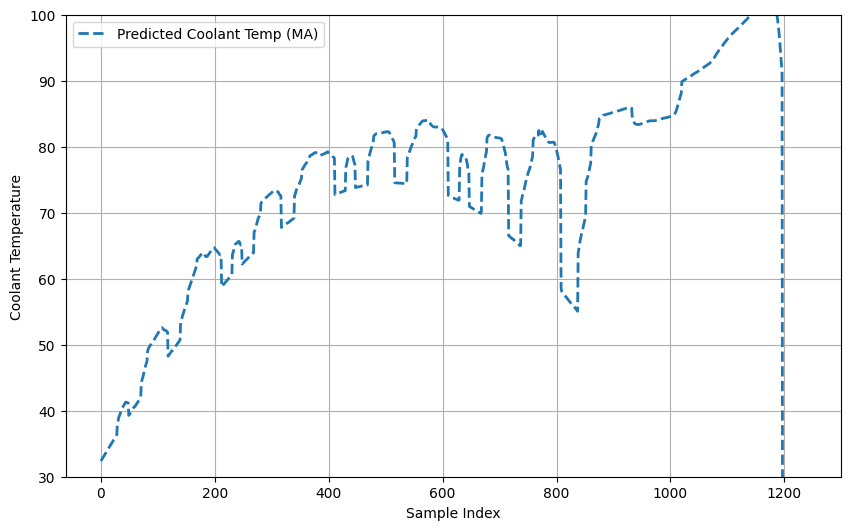

In [136]:
plt.figure(figsize=(10, 6))
# plt.plot(y*120, label='Actual Coolant Temp (MA)', linestyle='--', linewidth=2)
plt.plot(y_pred*120, label='Predicted Coolant Temp (MA)', linestyle='--', linewidth=2)

plt.xlabel('Sample Index')
plt.ylabel('Coolant Temperature')
plt.ylim(30, 100)
plt.legend()
plt.grid(True)
plt.show()

# GPR model pytorch

In [ ]:
import torch
import gpytorch
from torch.utils.data import DataLoader, TensorDataset
from gpytorch.models import ApproximateGP
from gpytorch.variational import CholeskyVariationalDistribution, VariationalStrategy

# 1. Define the Variational GP Model with Inducing Points
class VariationalGPModel(ApproximateGP):
    def __init__(self, inducing_points):
        # Define a variational distribution with a small number of inducing points
        variational_distribution = CholeskyVariationalDistribution(num_inducing_points=inducing_points.size(0))

        # Variational strategy with inducing points
        variational_strategy = VariationalStrategy(self, inducing_points, variational_distribution, learn_inducing_locations=True)

        super(VariationalGPModel, self).__init__(variational_strategy)

        # Mean and covariance modules
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# 2. Prepare Data for Mini-Batch Training
# Set up the training data as torch tensors
train_x = torch.tensor(X, dtype=torch.float32)  # Your X data
train_y = torch.tensor(y, dtype=torch.float32)  # Your y data

# Select number of inducing points (set this to a smaller value, e.g., 500)
inducing_points = train_x[:500]

# 3. Initialize Model and Likelihood
model = VariationalGPModel(inducing_points)
likelihood = gpytorch.likelihoods.GaussianLikelihood()

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
likelihood = likelihood.to(device)
train_x = train_x.to(device)
train_y = train_y.to(device)

# 4. Set Up DataLoader for Mini-Batch Learning
batch_size = 1024  # Set the batch size
dataset = TensorDataset(train_x, train_y)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 5. Train the Model Using Mini-Batches
model.train()
likelihood.train()

# Set up the Adam optimizer with a learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Marginal log likelihood for variational inference
mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_x.size(0))

# Number of epochs
num_epochs = 100

# Training loop with mini-batches
for epoch in range(num_epochs):
    for batch_x, batch_y in data_loader:
        # Set gradients to zero
        optimizer.zero_grad()

        # Get the model output
        output = model(batch_x)

        # Calculate the loss and backpropagate
        loss = -mll(output, batch_y)
        loss.backward()

        # Perform a step of optimization
        optimizer.step()

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {loss.item():.3f}')

# 6. Save the Model
import joblib
model_filename = 'variational_gp_model.pkl'
joblib.dump(model.state_dict(), model_filename)
print(f"Model saved as {model_filename}")


In [12]:
pip install torch gpytorch scikit-learn joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 10.8 MB/s eta 0:00:00


In [18]:
y = df_filtered['Coolant_temperature'].values

In [19]:
y

array([0.72, 0.72, 0.72, ..., 0.42, 0.42, 0.42])

In [20]:
(y.reshape(-1, 1)).squeeze()

array([0.72, 0.72, 0.72, ..., 0.42, 0.42, 0.42])

In [21]:
import torch
import gpytorch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Assuming df_filtered is your DataFrame and 'Coolant_temperature' is the target
# df_filtered = pd.read_csv('your_data.csv')  # Example of loading data

# 1. Split data into features and target
X = df_filtered.drop('Coolant_temperature', axis=1).values
y = df_filtered['Coolant_temperature'].values

# # 2. Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# 3. Feature Scaling
# scaler_X = StandardScaler()
X_train_scaled = X
X_test_scaled = X

# scaler_y = StandardScaler()
y_train_scaled = y
y_test_scaled = y

# 4. Convert to torch tensors
train_x = torch.from_numpy(X_train_scaled).float()
train_y = torch.from_numpy(y_train_scaled).float()

test_x = torch.from_numpy(X_test_scaled).float()
test_y = torch.from_numpy(y_test_scaled).float()

In [22]:
# 6. Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

# 7. Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

training_iterations = 100
for i in range(training_iterations):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    if (i+1) % 10 == 0:
        print(f'Iteration {i+1}/{training_iterations} - Loss: {loss.item():.3f}')
    optimizer.step()



In [ ]:
# 6. Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)

# 7. Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

training_iterations = 100
for i in range(training_iterations):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    if (i+1) % 10 == 0:
        print(f'Iteration {i+1}/{training_iterations} - Loss: {loss.item():.3f}')
    optimizer.step()



In [ ]:

# 8. Make predictions
model.eval()
likelihood.eval()

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(test_x))
    mean_pred = observed_pred.mean.numpy()
    # Optionally, get confidence intervals
    # lower, upper = observed_pred.confidence_region()

# 9. Inverse transform the predictions and targets
y_pred = mean_pred
y_true = test_y.numpy()

# 10. Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"gpytorch Gaussian Process Regressor Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# 11. Save the model and scalers
model_filename = 'best_coolant_temperature_model_gpytorch.pth'
scaler_filename = 'scaler_gpytorch.pkl'

# Save model state_dict and likelihood state_dict
torch.save({
    'model_state_dict': model.state_dict(),
    'likelihood_state_dict': likelihood.state_dict(),
}, model_filename)

# Save scalers
joblib.dump(scaler_X, 'scaler_X_gpytorch.pkl')
joblib.dump(scaler_y, 'scaler_y_gpytorch.pkl')

print(f"Best gpytorch model saved as {model_filename}")
print(f"Scalers saved as scaler_X_gpytorch.pkl and scaler_y_gpytorch.pkl")

In [ ]:
import torch
import gpytorch
import joblib
import pandas as pd

# 1. Define the ExactGPModel class again (required to load the state_dict)
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# 2. Load scalers
scaler_X = joblib.load('scaler_X_gpytorch.pkl')
scaler_y = joblib.load('scaler_y_gpytorch.pkl')

# 3. Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x=None, train_y=None, likelihood=likelihood)  # Dummy data

# 4. Load the saved state_dict
checkpoint = torch.load('best_coolant_temperature_model_gpytorch.pth')
model.load_state_dict(checkpoint['model_state_dict'])
likelihood.load_state_dict(checkpoint['likelihood_state_dict'])

model.eval()
likelihood.eval()

# 5. Prepare new data for prediction
new_data = pd.DataFrame({
    # Replace with actual feature names and values
    'feature1': [value1],
    'feature2': [value2],
    # ...
})

# 6. Scale the new data
new_data_scaled = scaler_X.transform(new_data.values)
new_x = torch.from_numpy(new_data_scaled).float()

# 7. Make prediction
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    observed_pred = likelihood(model(new_x))
    mean_pred = observed_pred.mean.numpy()

# 8. Inverse transform the prediction
predicted_temperature = scaler_y.inverse_transform(mean_pred)
print(f"Predicted Coolant Temperature: {predicted_temperature[0]:.2f}")
